In [462]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from xgboost import XGBClassifier


import joblib

import warnings                                                                 
warnings.filterwarnings('ignore')

In [361]:
import datetime as dt


In [362]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

pd.set_option("display.max_columns", None)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Exploratory Data Analysis

In [363]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [364]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [365]:
df.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1200,2009-12-28,CoffsHarbour,23.7,26.1,0.4,5.6,1.8,NE,48.0,N,NNE,13.0,24.0,88.0,85.0,1015.4,1013.2,8.0,7.0,24.3,24.5,No,Yes


In [366]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Seprating the Numerical Features and categorical feature

In [367]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


# Checking Null values

In [368]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [369]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

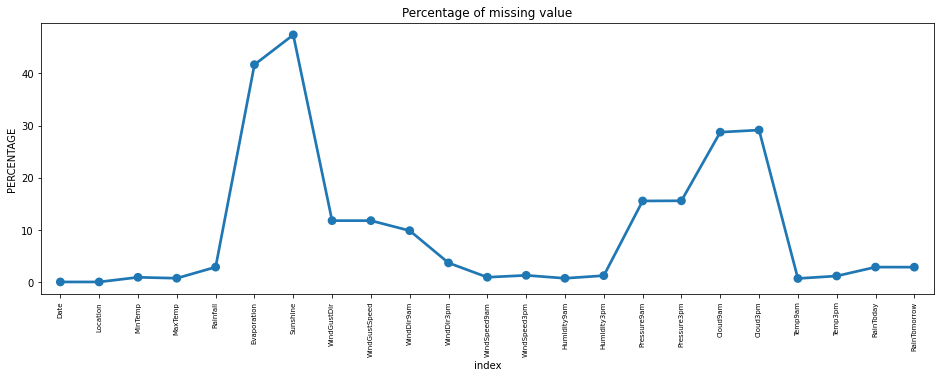

In [370]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()

plt.figure(figsize=(16,5))

ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)

plt.ylabel('PERCENTAGE')
plt.title('Percentage of missing value')

plt.show()

In [371]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [372]:
print(categorical_feature)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [373]:
print(continuous_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [374]:
print(discrete_feature)

['Cloud9am', 'Cloud3pm']


In [375]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [376]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [377]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Correlation between numerical variable:

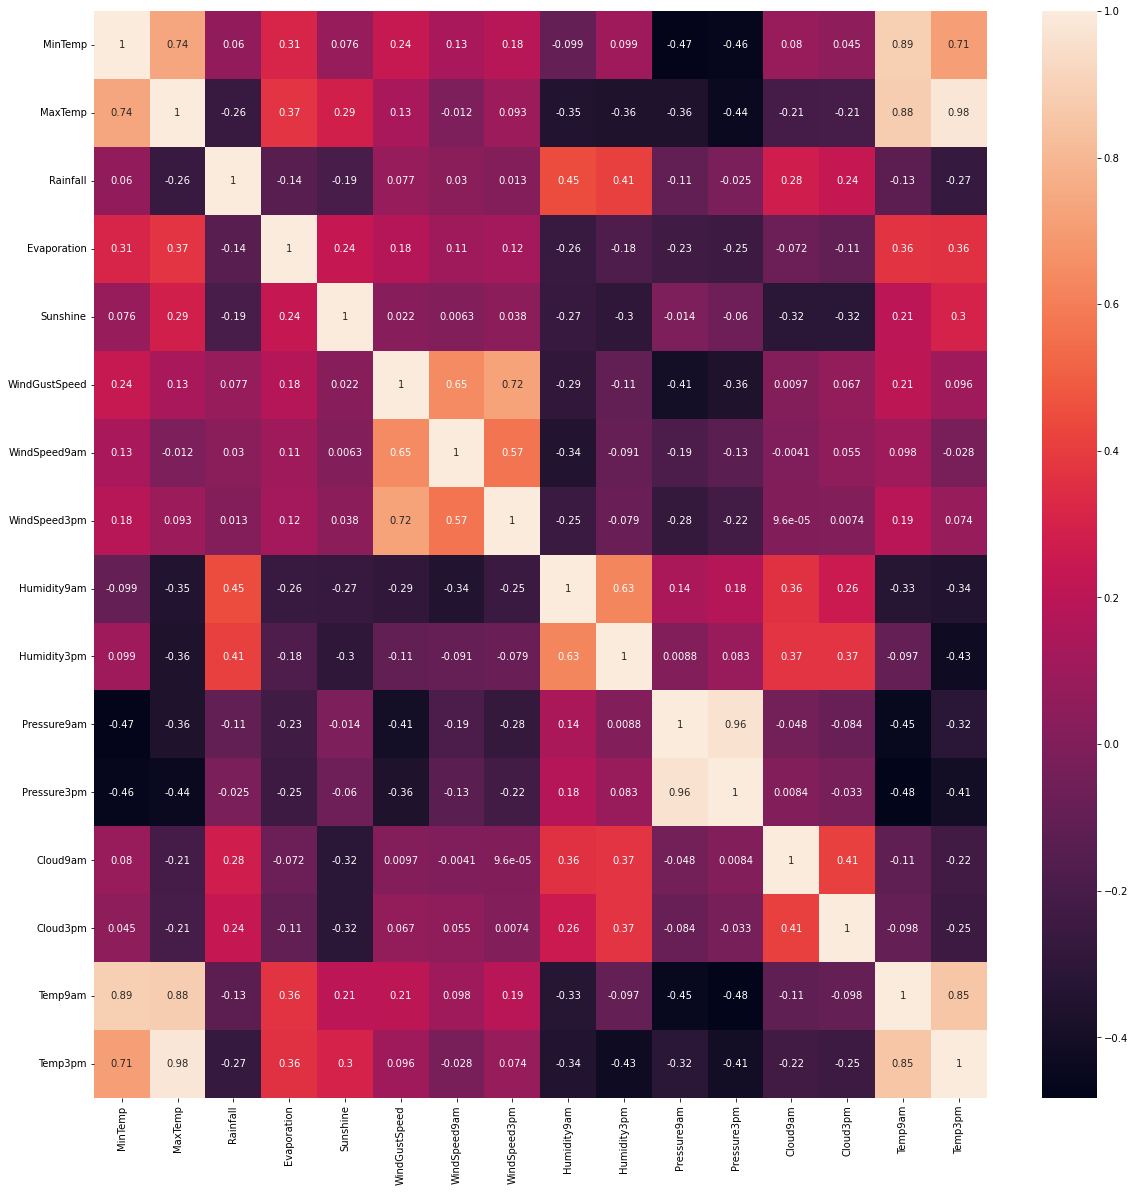

In [378]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

# Checking Outliers & treating null values

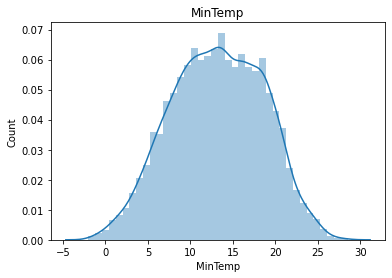

<Figure size 1080x1080 with 0 Axes>

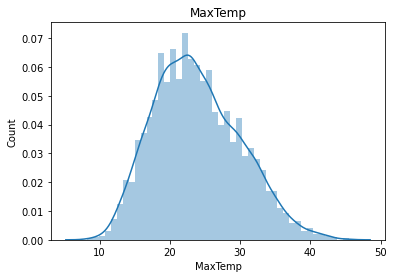

<Figure size 1080x1080 with 0 Axes>

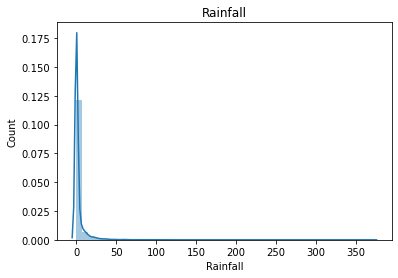

<Figure size 1080x1080 with 0 Axes>

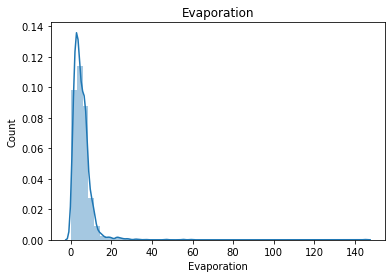

<Figure size 1080x1080 with 0 Axes>

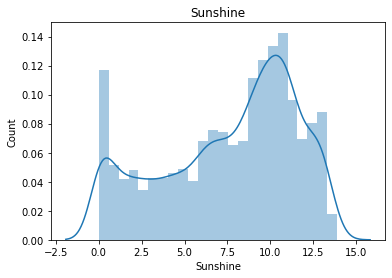

<Figure size 1080x1080 with 0 Axes>

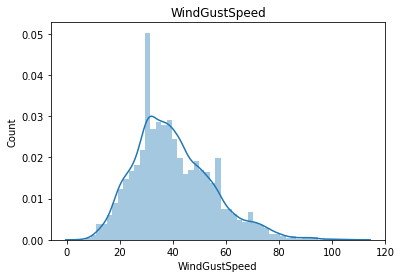

<Figure size 1080x1080 with 0 Axes>

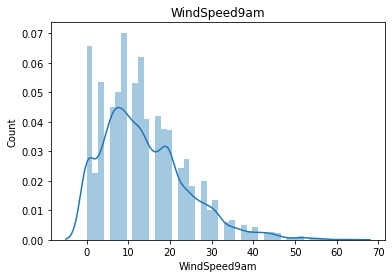

<Figure size 1080x1080 with 0 Axes>

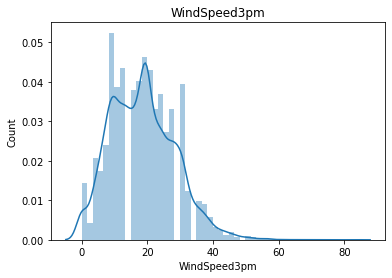

<Figure size 1080x1080 with 0 Axes>

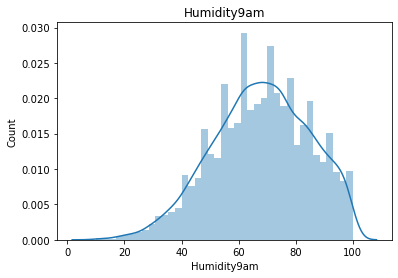

<Figure size 1080x1080 with 0 Axes>

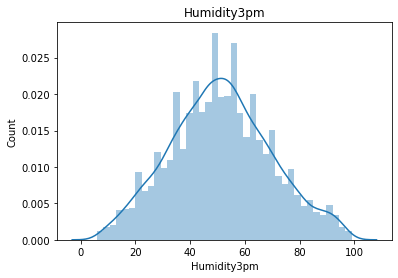

<Figure size 1080x1080 with 0 Axes>

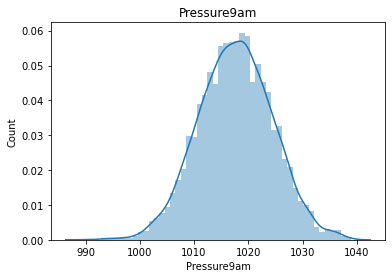

<Figure size 1080x1080 with 0 Axes>

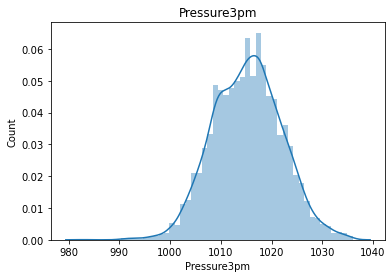

<Figure size 1080x1080 with 0 Axes>

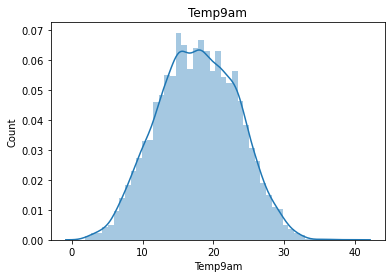

<Figure size 1080x1080 with 0 Axes>

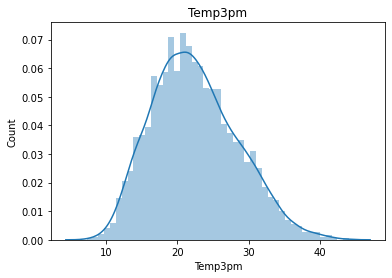

<Figure size 1080x1080 with 0 Axes>

In [379]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

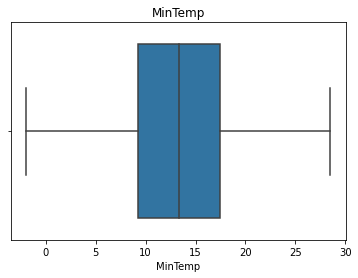

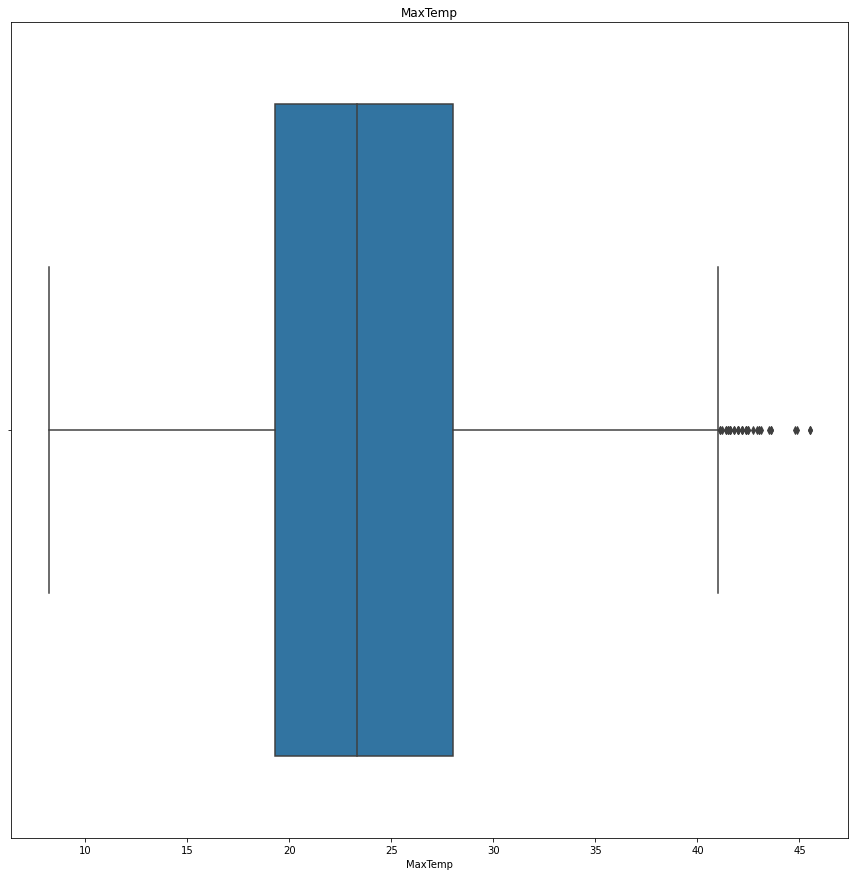

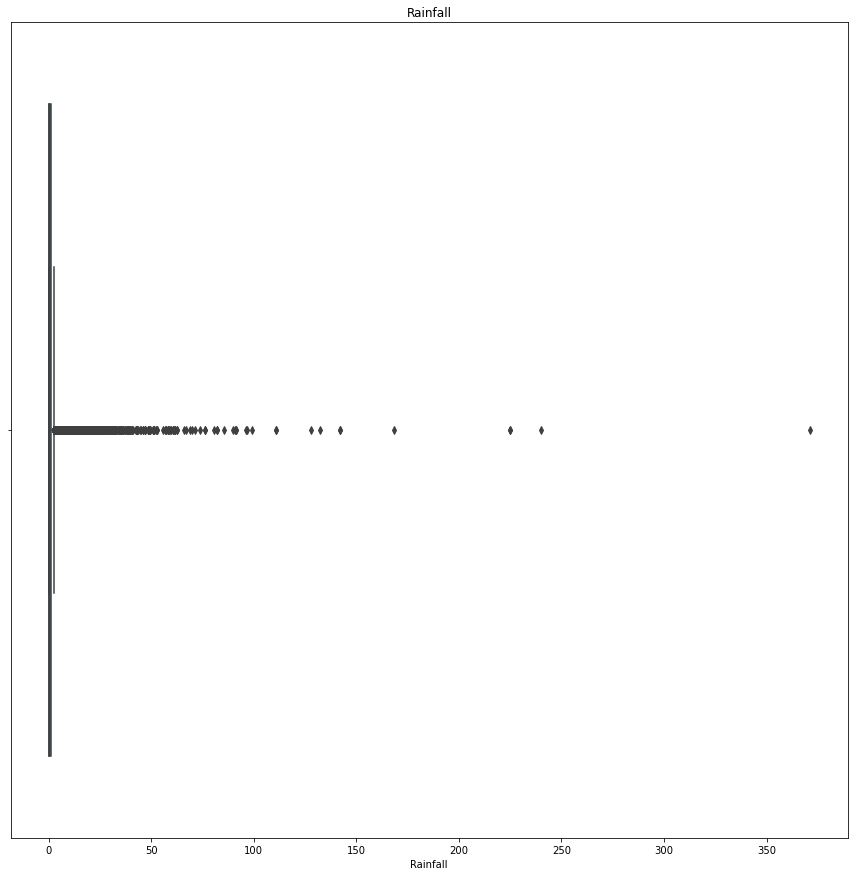

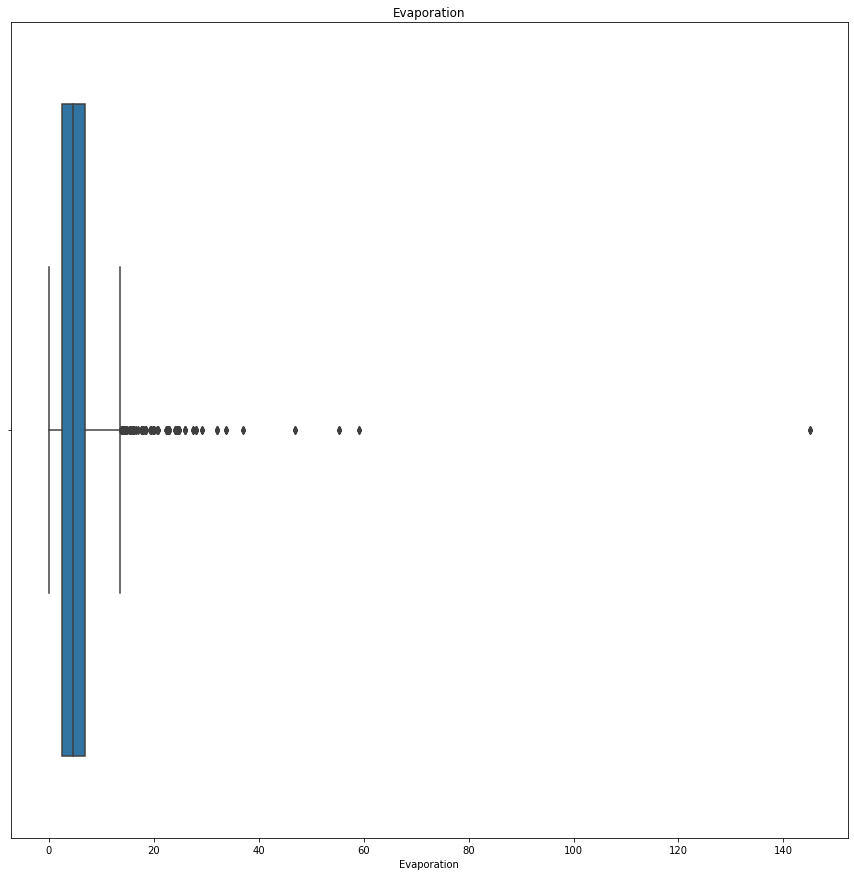

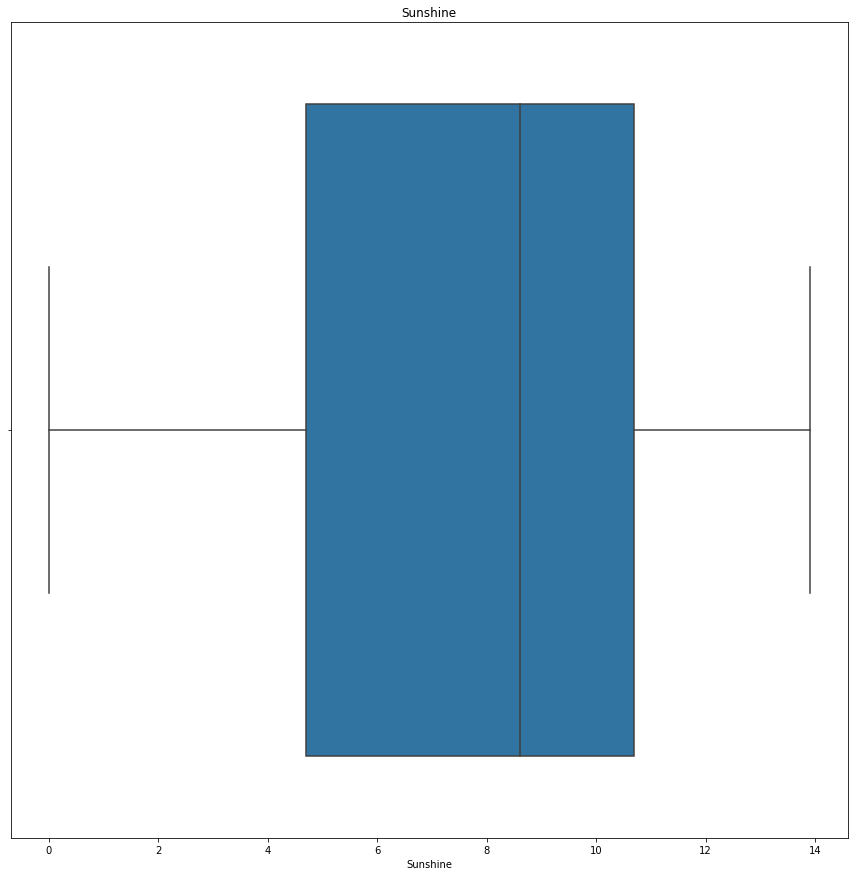

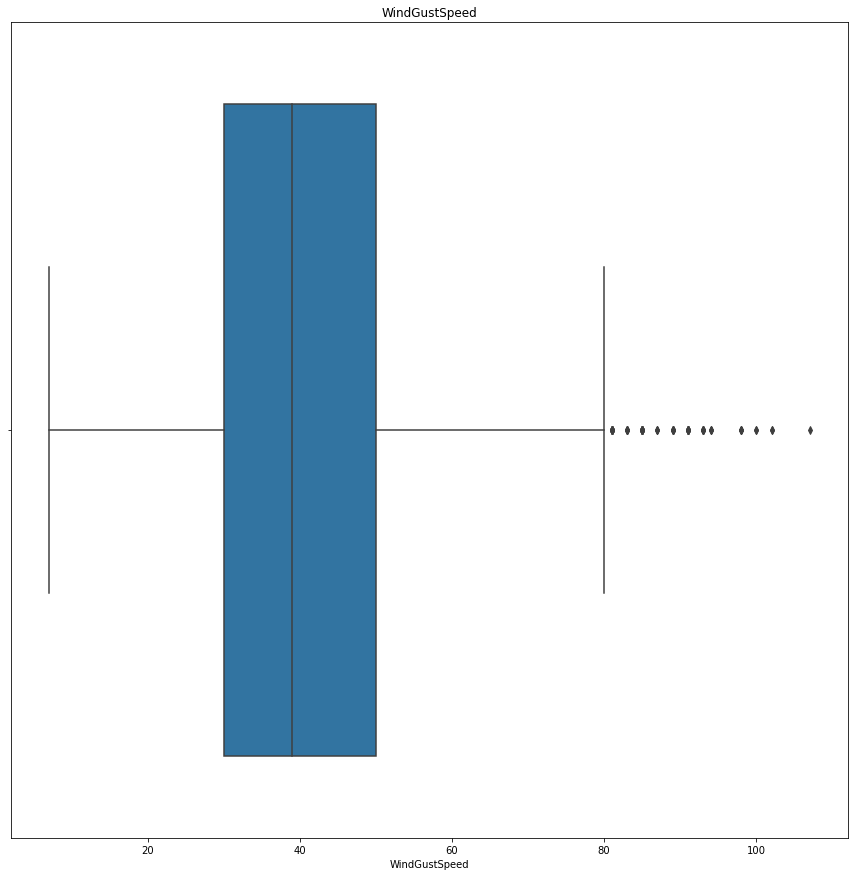

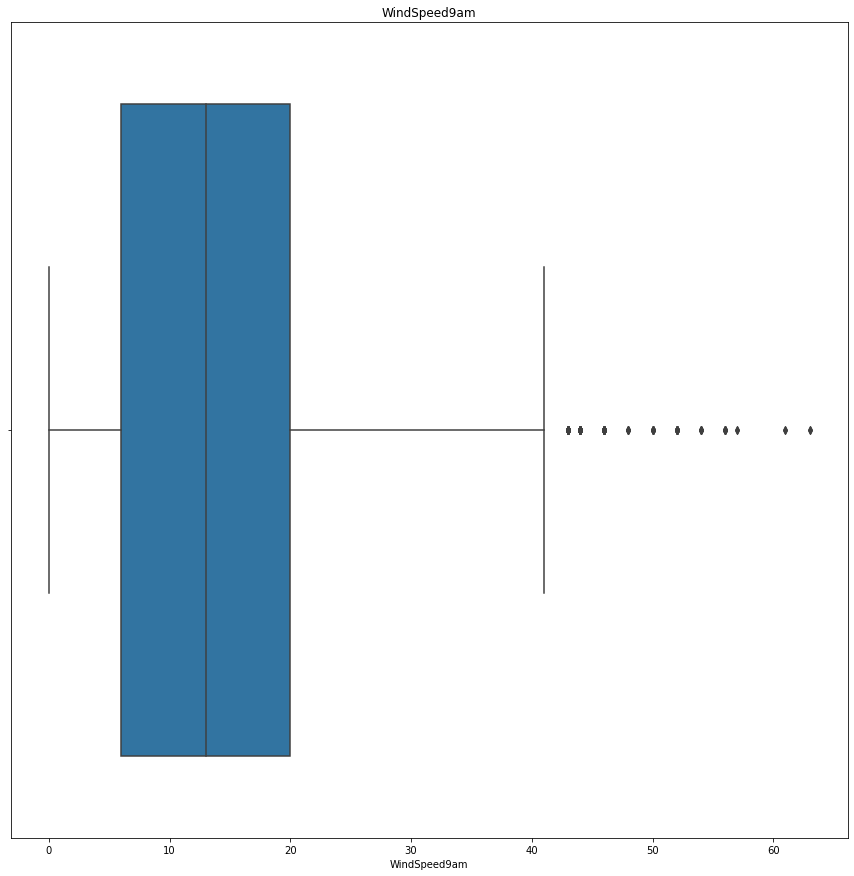

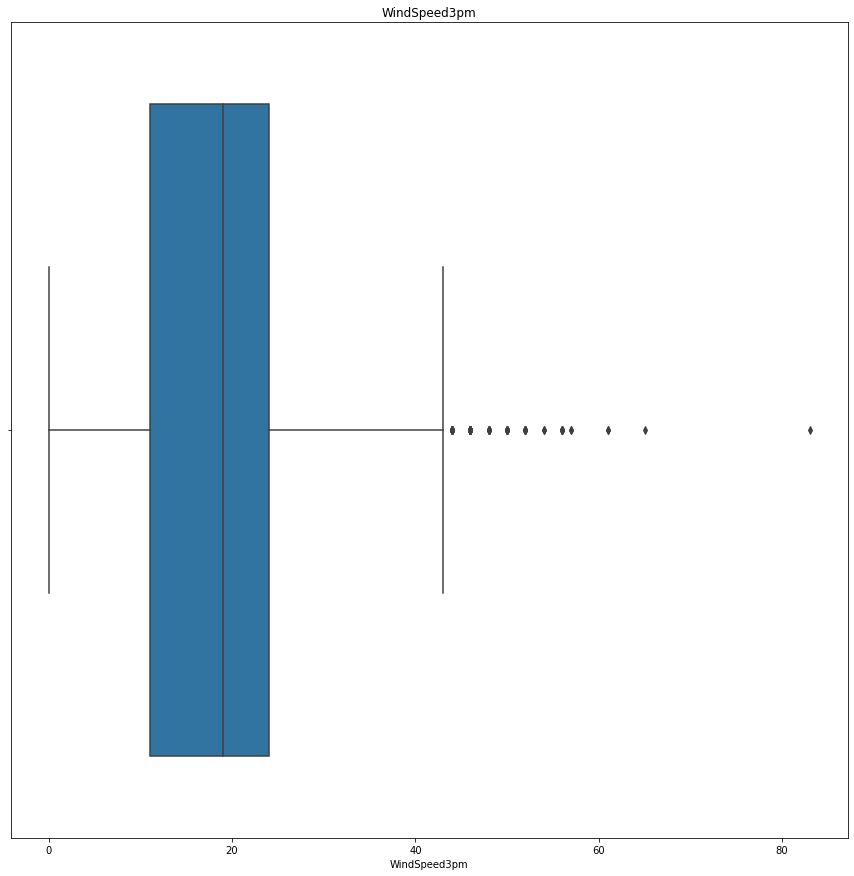

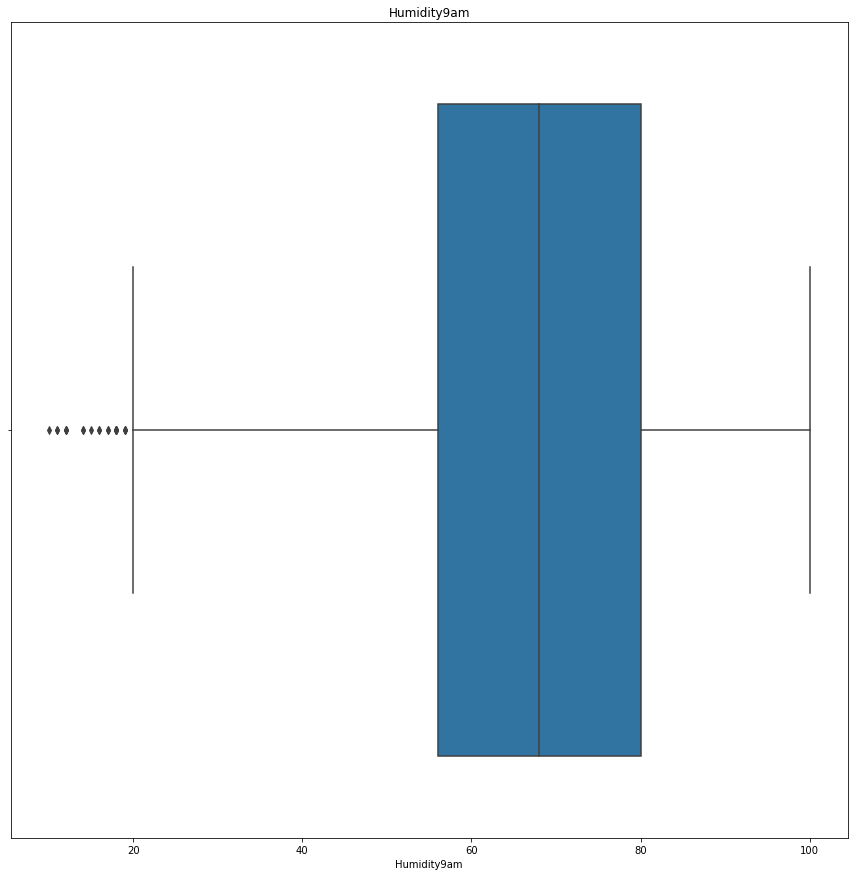

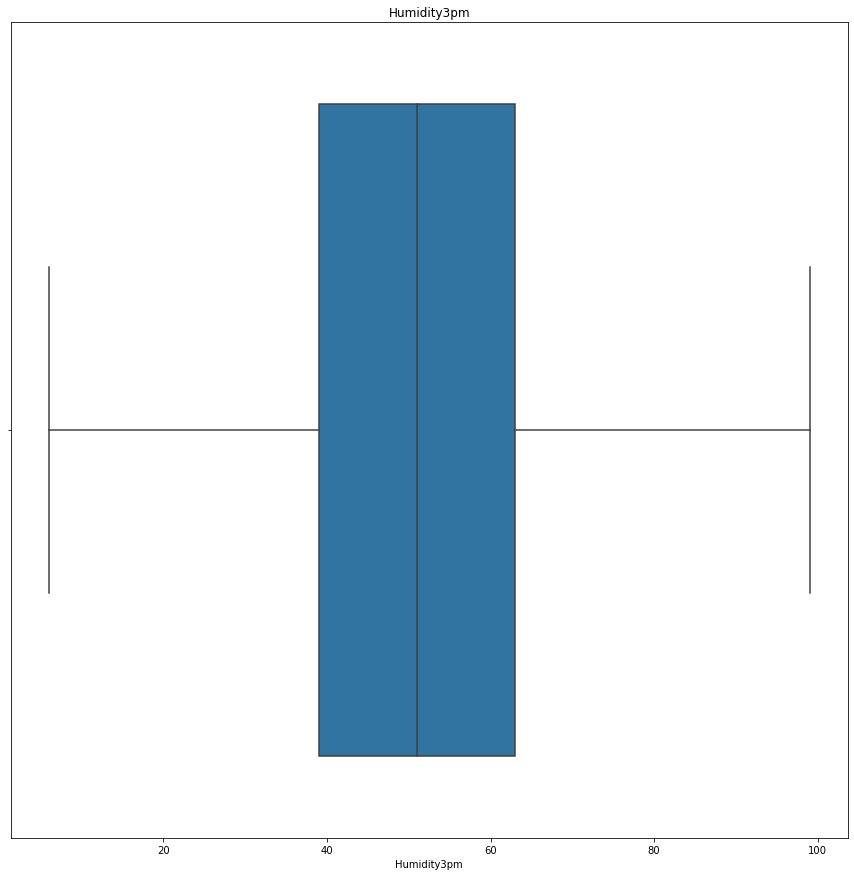

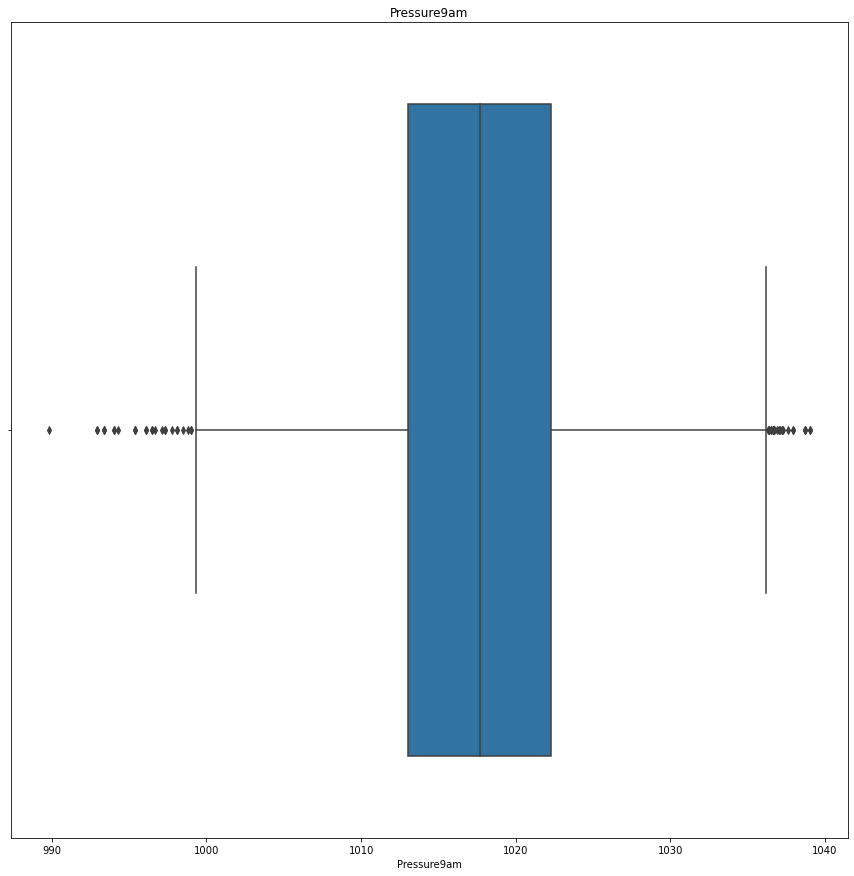

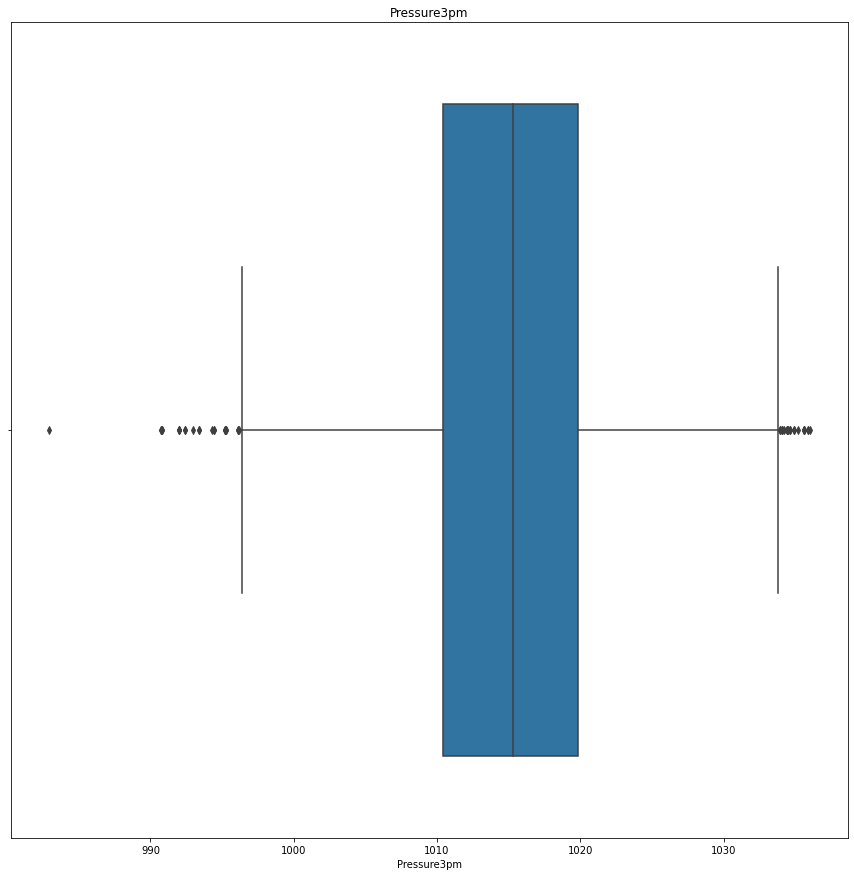

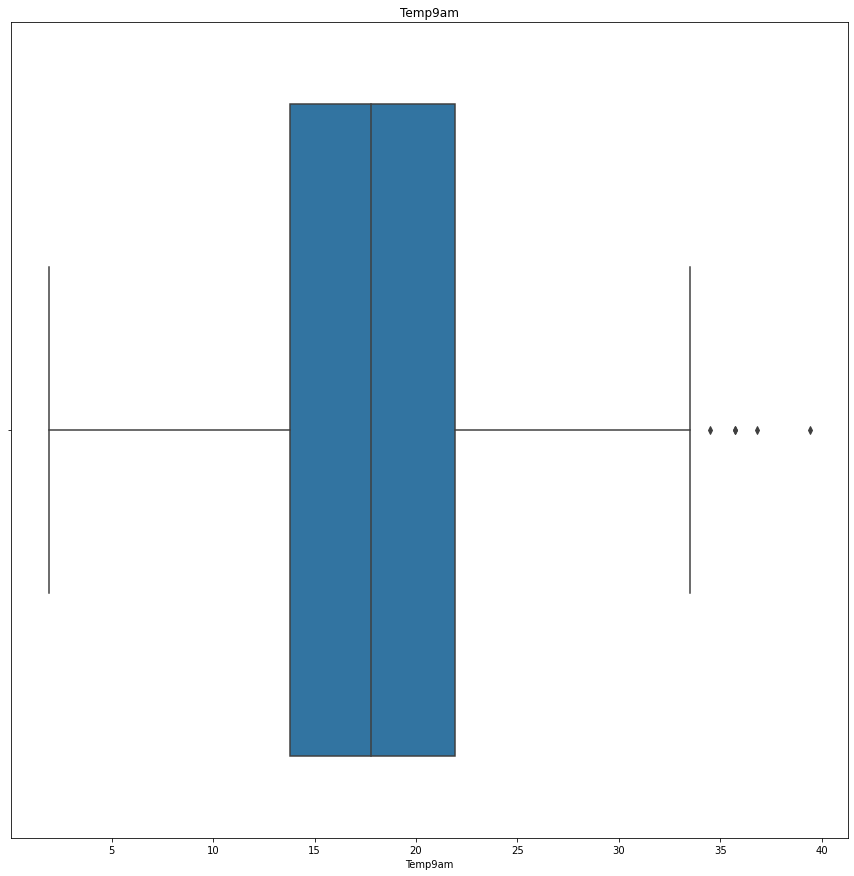

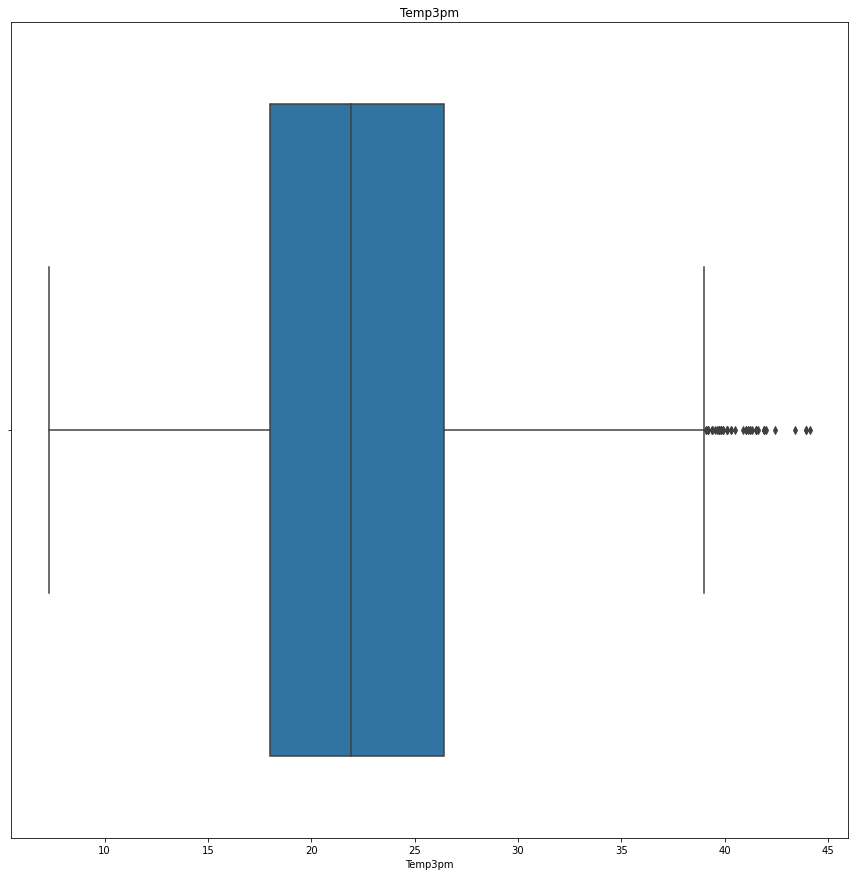

<Figure size 1080x1080 with 0 Axes>

In [380]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [381]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [382]:
df.isnull().sum()*100/len(df)


Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed     0.000000
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [383]:
discrete_feature


['Cloud9am', 'Cloud3pm']

In [384]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [385]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [386]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2015-01-26', '2017-02-28', '2014-04-26', '2014-04-27', '2017-02-25',
       '2017-02-26', '2015-11-04', '2015-11-03', '2017-02-27', '2017-03-01',
       ...
       '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
       '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Index(['CoffsHarbour', 'Wollongong', 'Melbourne', 'Williamtown', 'Newcastle',
       'Penrith', 'Brisbane', 'Adelaide', 'Albury', 'PerthAirport', 'Darwin',
       'Uluru'],
      dtype='object', name='Location')
WindGustDir Index(['NNW', 'SSW', 'N', 'WSW', 'NW', 'SW', 'NNE', 'S', 'WNW', 'NE', 'SSE',
       'SE', 'ESE', 'W', 'ENE', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['N', 'WNW', 'SW', 'W', 'NNE', 'NNW', 'SSW', 'ESE', 'WSW', 'S', 'NW',
       'NE', 'SSE', 'SE', 'ENE', 'E'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['NNW', 'SSW', 'N', 'NW', 'S', 'WSW', 'SW', 'NNE', 'S

In [387]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [388]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [389]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [390]:
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [391]:
df['Location'].nunique()

12

In [392]:
location = {'Albury':1, 'CoffsHarbour':2, 'Newcastle':3, 'Penrith':4, 'Williamtown':5,
       'Wollongong':6, 'Melbourne':7, 'Brisbane':8, 'Adelaide':9, 'PerthAirport':10,
       'Darwin':11, 'Uluru':12}
df["Location"] = df["Location"].map(location)

In [393]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")


In [394]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [395]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,1,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0,12,1
1,2008-12-02,1,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0,12,2
2,2008-12-03,1,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,1,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,1,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,12,2.8,23.4,0.0,6.4,1.2,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0,6,21
8421,2017-06-22,12,3.6,25.3,0.0,12.6,7.1,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0,6,22
8422,2017-06-23,12,5.4,26.9,0.0,4.2,13.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0,6,23
8423,2017-06-24,12,7.8,27.0,0.0,4.0,13.1,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


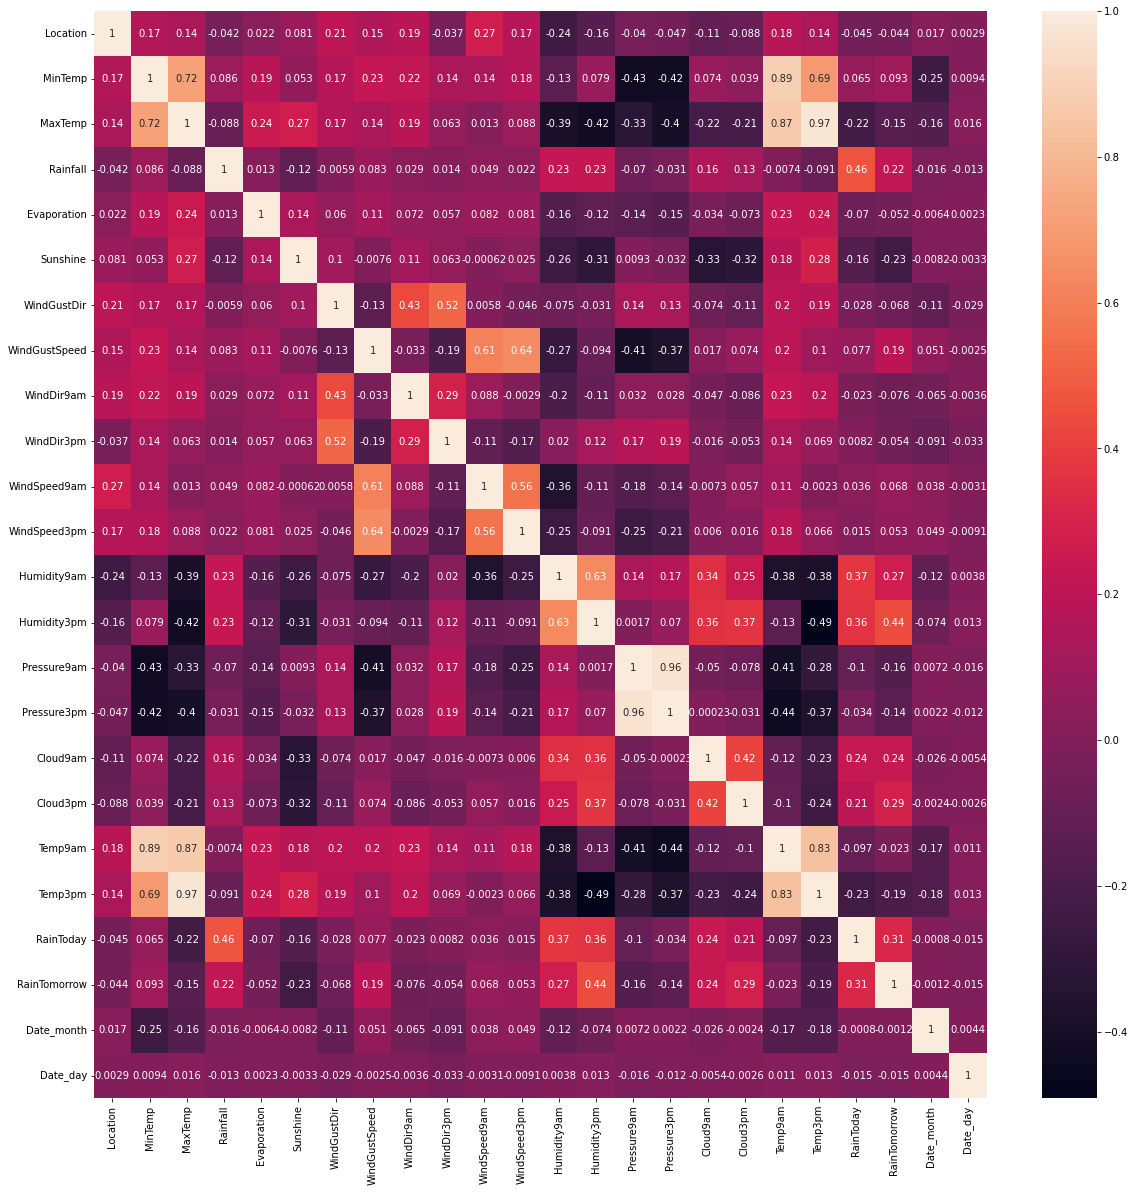

In [396]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

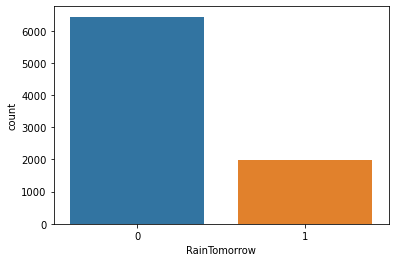

In [397]:
sns.countplot(df["RainTomorrow"])


In [398]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,1,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0,12,1
1,2008-12-02,1,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0,12,2
2,2008-12-03,1,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,1,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,1,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,12,2.8,23.4,0.0,6.4,1.2,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0,6,21
8421,2017-06-22,12,3.6,25.3,0.0,12.6,7.1,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0,6,22
8422,2017-06-23,12,5.4,26.9,0.0,4.2,13.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0,6,23
8423,2017-06-24,12,7.8,27.0,0.0,4.0,13.1,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


# Removing Outliers

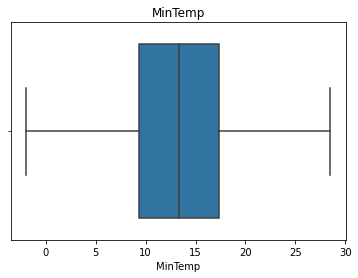

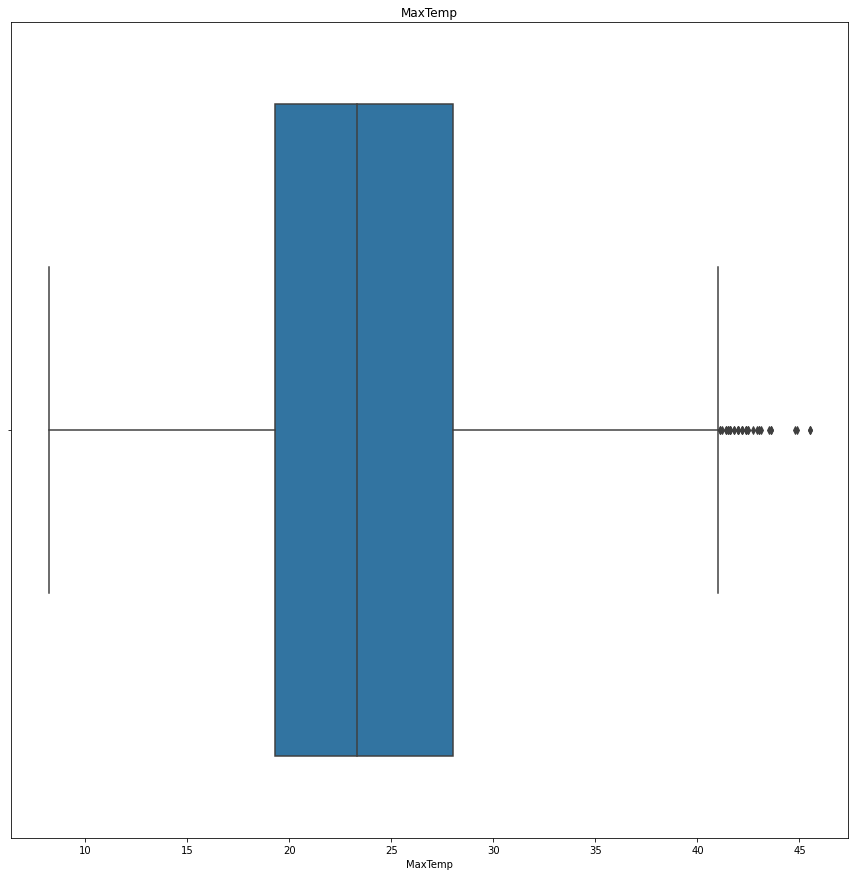

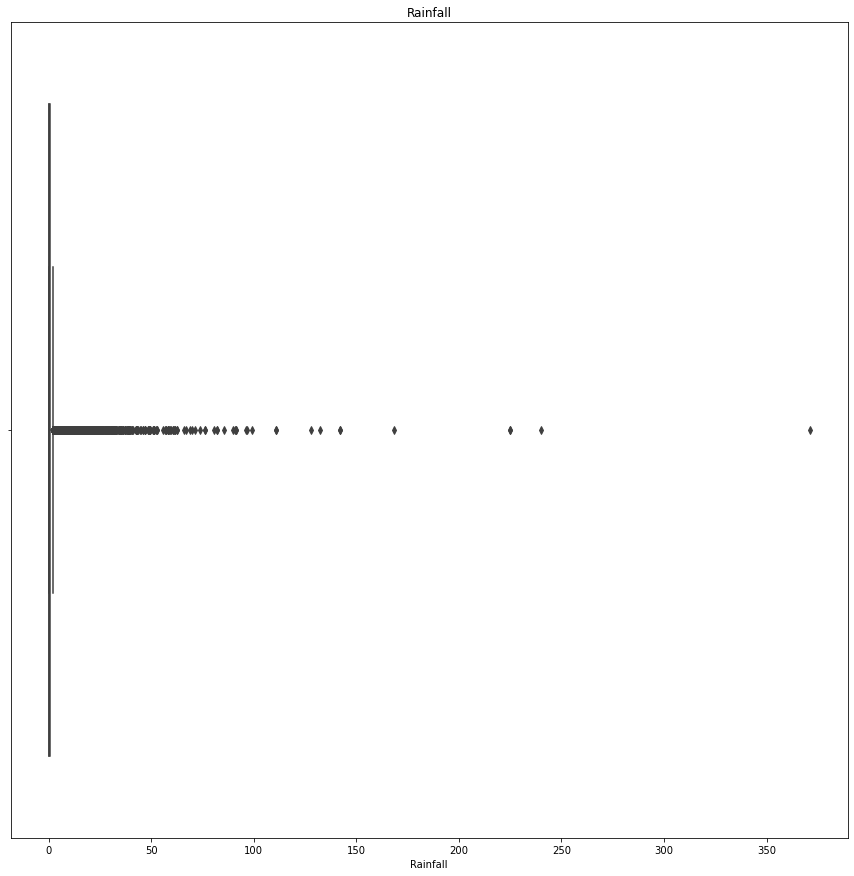

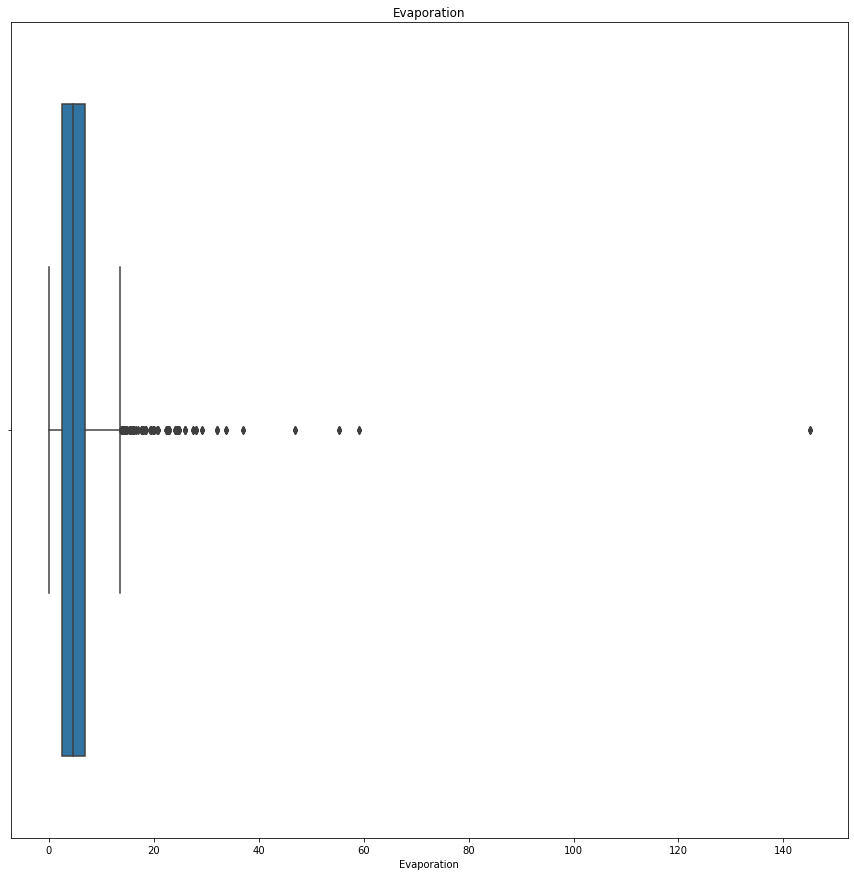

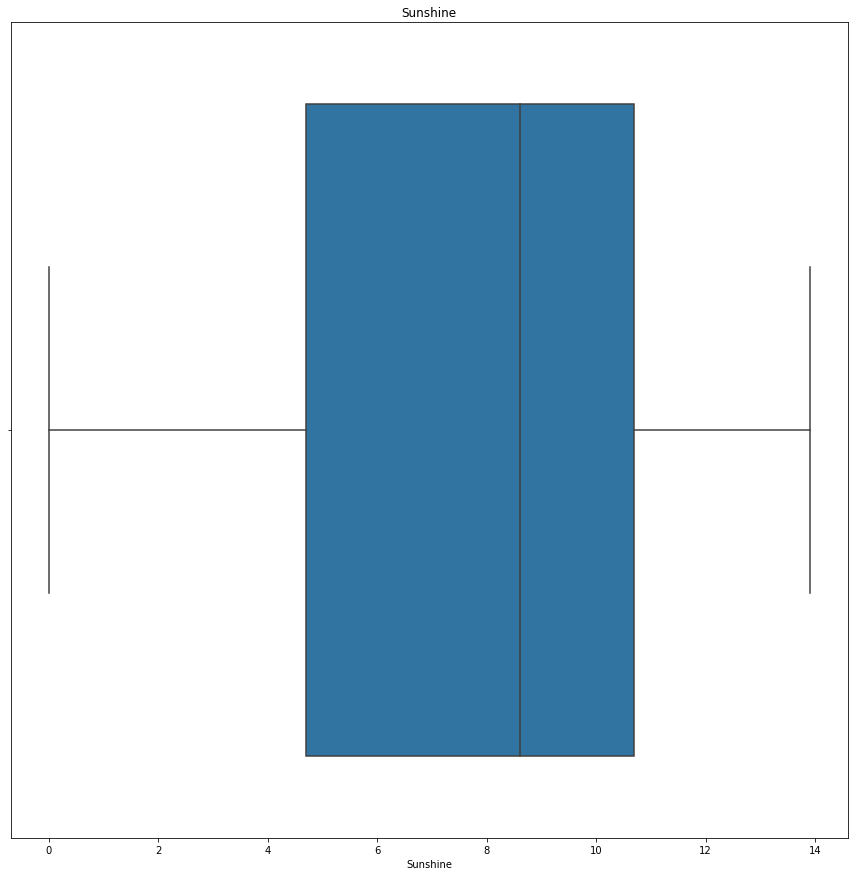

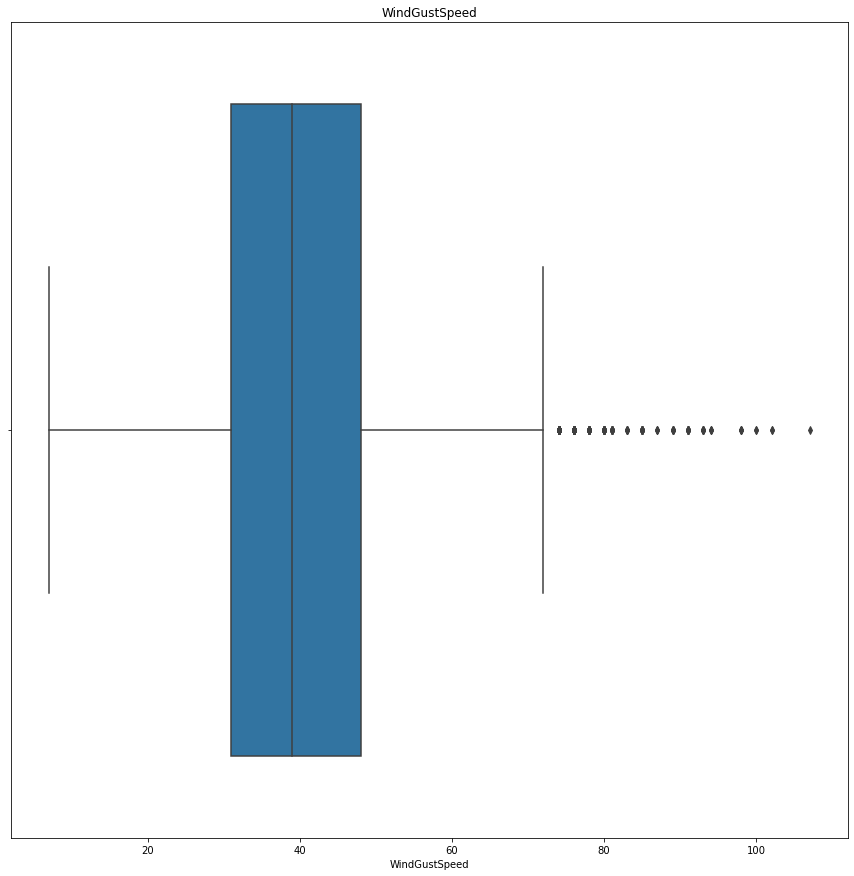

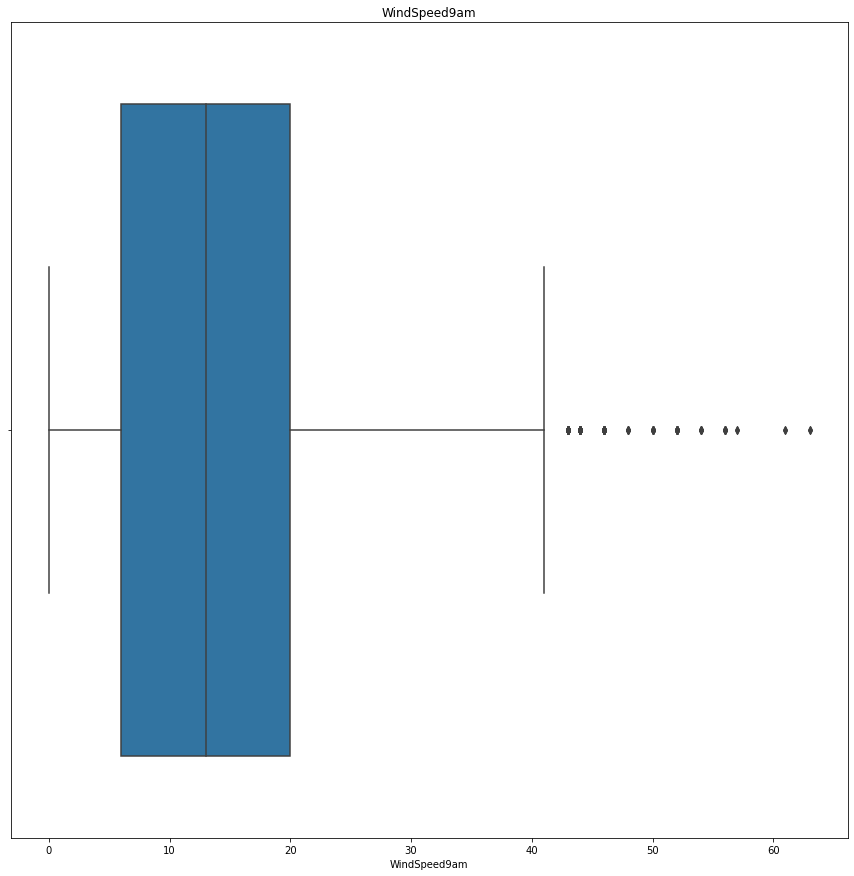

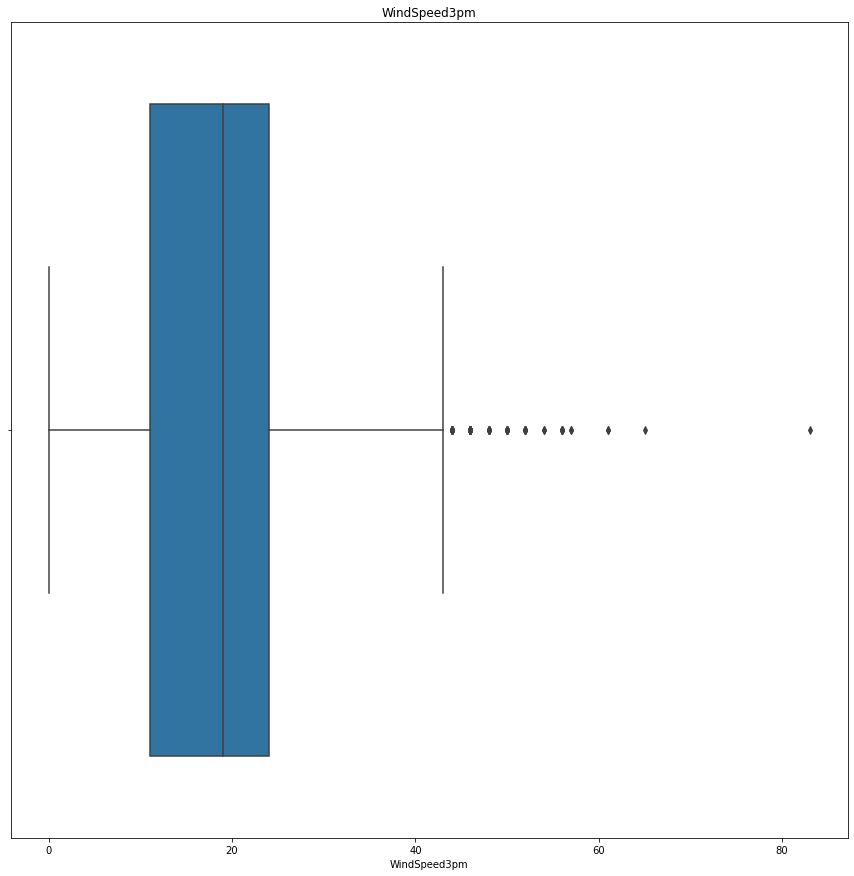

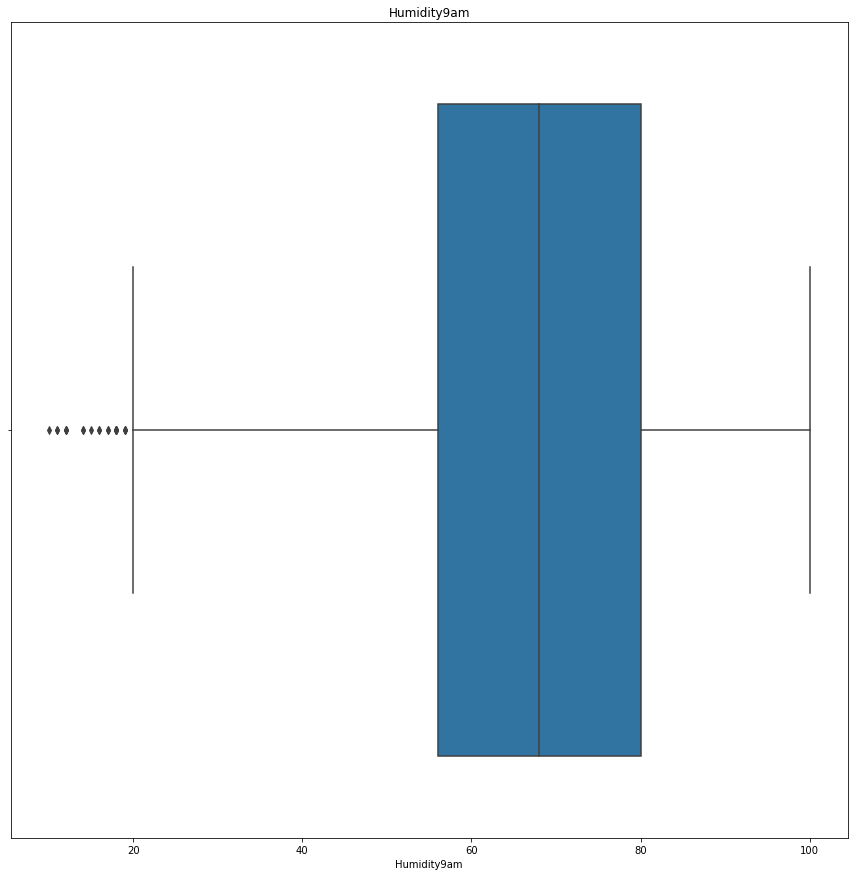

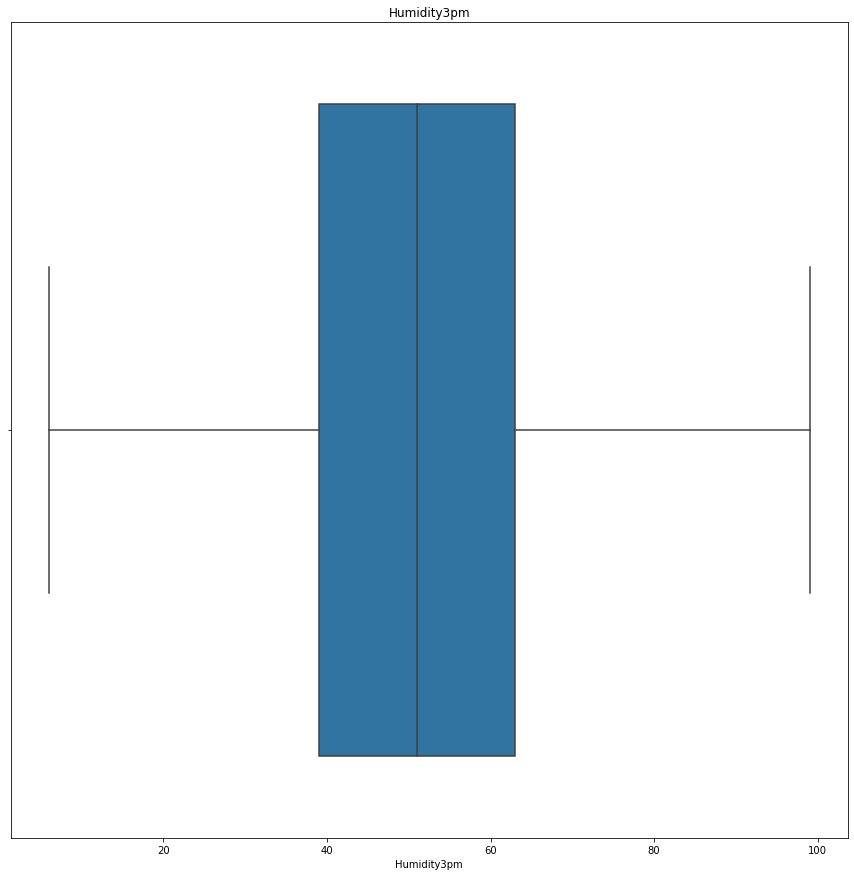

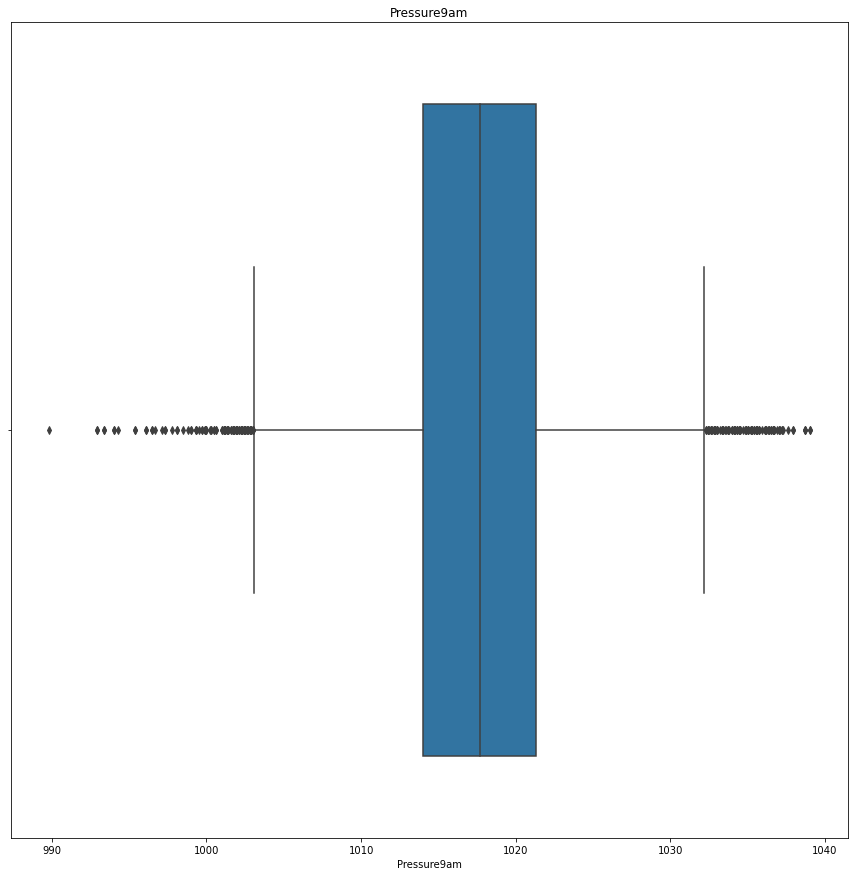

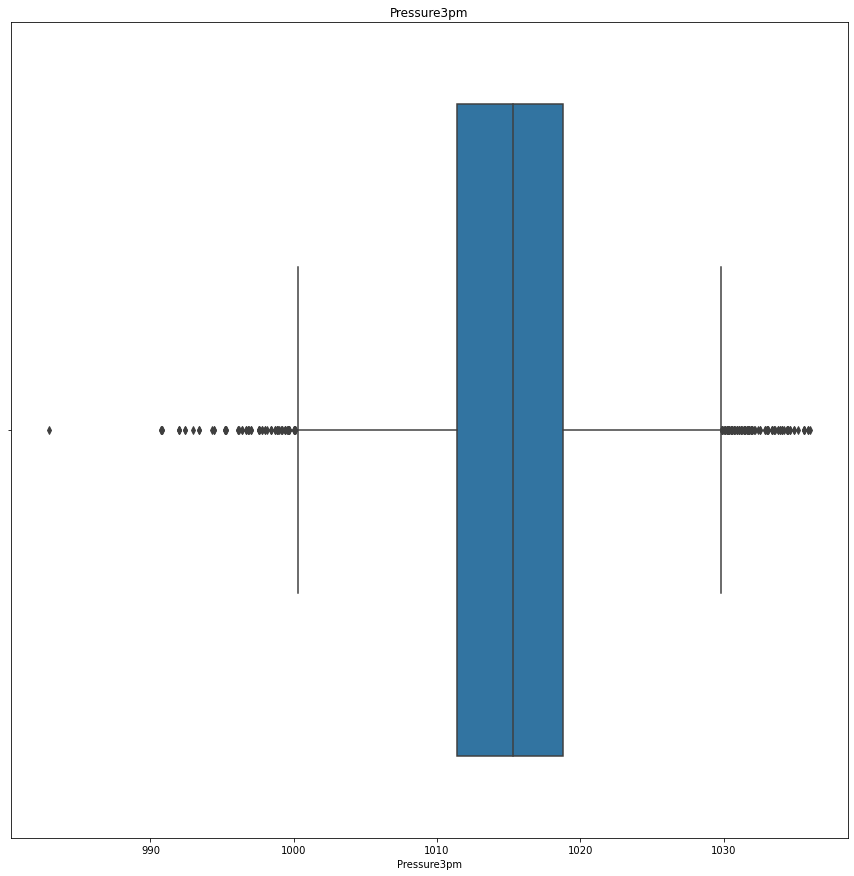

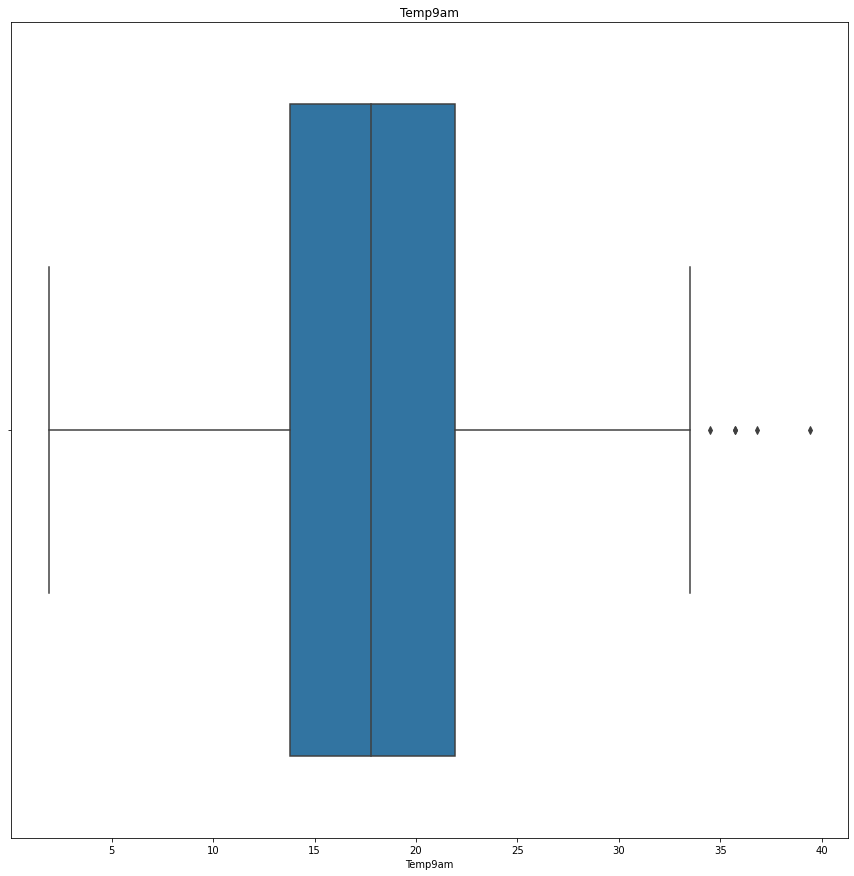

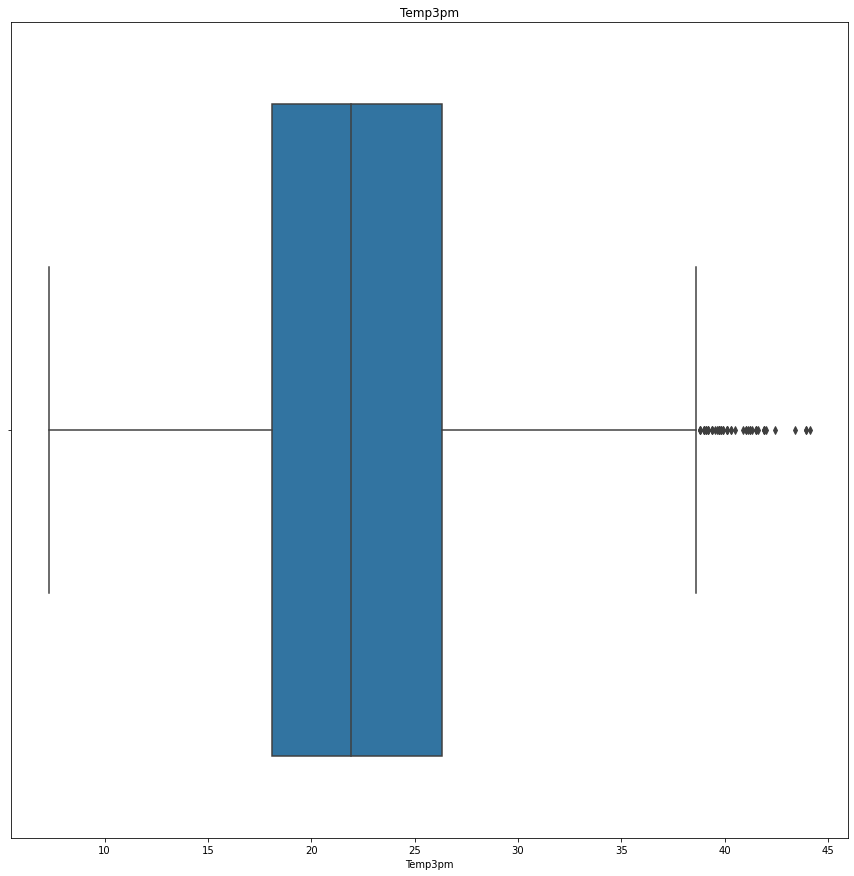

<Figure size 1080x1080 with 0 Axes>

In [399]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [400]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


In [405]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.6999999999999993 29.3


In [406]:
df.loc[df['MinTemp']>=29.3,'MinTemp']=29.3
df.loc[df['MinTemp']<=-2.69,'MinTemp']=-2.69

<AxesSubplot:xlabel='MinTemp'>

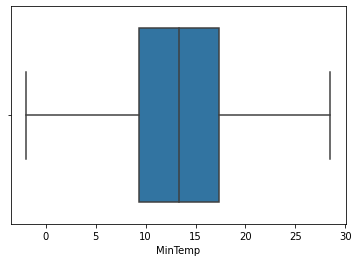

In [407]:
sns.boxplot(df['MinTemp'])

In [401]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.250000000000002 41.05


In [402]:
df.loc[df['MaxTemp']>=41.05,'MaxTemp']=41.05
df.loc[df['MaxTemp']<=6.25,'MaxTemp']=6.25

<AxesSubplot:xlabel='MaxTemp'>

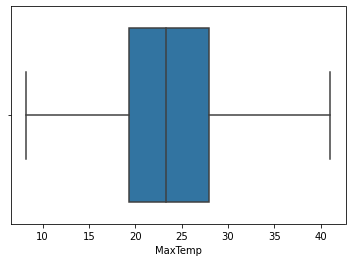

In [404]:
sns.boxplot(df['MaxTemp'])

In [408]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.2000000000000002 2.0


In [409]:
df.loc[df['Rainfall']>=2.0,'Rainfall']=2.0
df.loc[df['Rainfall']<=-1.20,'Rainfall']=-1.20

<AxesSubplot:xlabel='MaxTemp'>

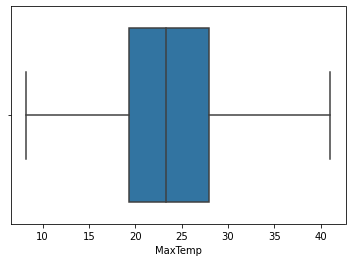

In [410]:
sns.boxplot(df['MaxTemp'])

In [411]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.0 13.600000000000001


In [412]:
df.loc[df['Evaporation']>=13.60,'Evaporation']=13.60
df.loc[df['Evaporation']<=-4.0,'Evaporation']=-4.0

<AxesSubplot:xlabel='Evaporation'>

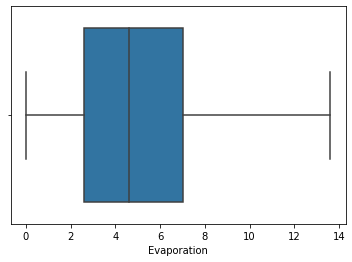

In [413]:
sns.boxplot(df['Evaporation'])

In [414]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.5 73.5


In [415]:
df.loc[df['WindGustSpeed']>=73.5,'WindGustSpeed']=73.5
df.loc[df['WindGustSpeed']<=5.5,'WindGustSpeed']=5.5

<AxesSubplot:xlabel='WindGustSpeed'>

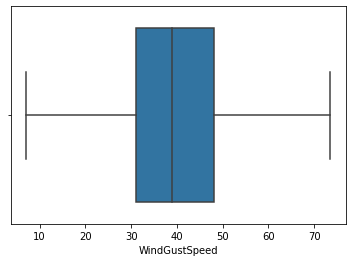

In [416]:
sns.boxplot(df['WindGustSpeed'])

In [417]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-15.0 41.0


In [418]:
df.loc[df['WindSpeed9am']>=41.0,'WindSpeed9am']=41.0
df.loc[df['WindSpeed9am']<=-15.0,'WindSpeed9am']=-15.0

<AxesSubplot:xlabel='WindSpeed9am'>

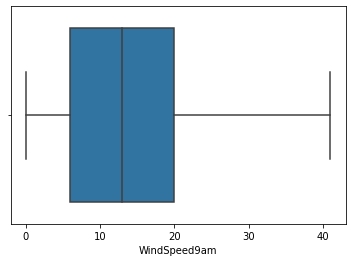

In [419]:
sns.boxplot(df['WindSpeed9am'])

In [420]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-8.5 43.5


In [421]:
df.loc[df['WindSpeed3pm']>43.5,'WindSpeed3pm']=43.5
df.loc[df['WindSpeed3pm']<=-8.5,'WindSpeed3pm']=-8.5

<AxesSubplot:xlabel='WindSpeed3pm'>

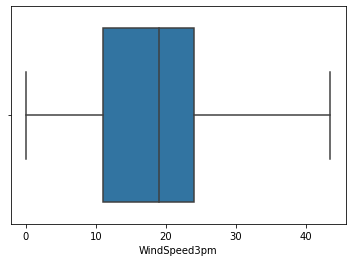

In [422]:
sns.boxplot(df['WindSpeed3pm'])

In [423]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

20.0 116.0


In [424]:
df.loc[df['Humidity9am']>=116.0,'Humidity9am']=116.0
df.loc[df['Humidity9am']<=20.0,'Humidity9am']=20.0

<AxesSubplot:xlabel='Humidity9am'>

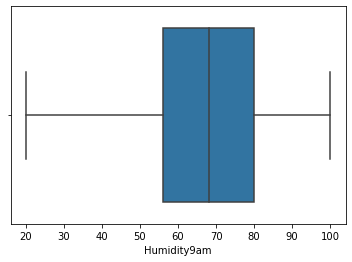

In [425]:
sns.boxplot(df['Humidity9am'])

In [426]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1003.0500000000001 1032.25


In [427]:
df.loc[df['Pressure9am']>=1032.25,'Pressure9am']=1032.25
df.loc[df['Pressure9am']<=1003.05,'Pressure9am']=1003.05

<AxesSubplot:xlabel='Pressure9am'>

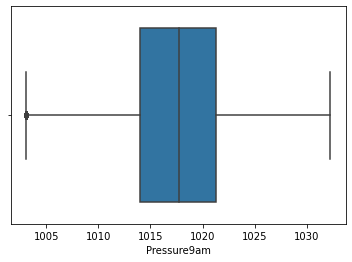

In [428]:
sns.boxplot(df['Pressure9am'])

In [429]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1000.3 1029.8999999999999


In [430]:
df.loc[df['Pressure3pm']>=1029.89,'Pressure3pm']=1029.89
df.loc[df['Pressure3pm']<=1000.3,'Pressure3pm']=1000.3

<AxesSubplot:xlabel='Pressure3pm'>

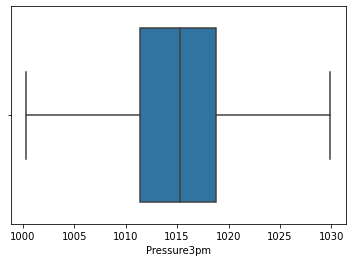

In [431]:
sns.boxplot(df['Pressure3pm'])

In [432]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.650000000000004 34.05


In [433]:
df.loc[df['Temp9am']>=34.05,'Temp9am']=34.05
df.loc[df['Temp9am']<=-1.65,'Temp9am']=-1.65

<AxesSubplot:xlabel='Temp9am'>

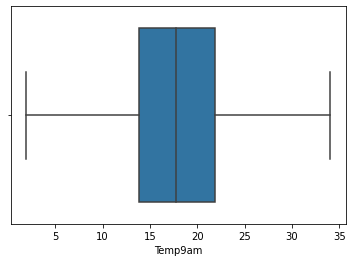

In [434]:
sns.boxplot(df['Temp9am'])

In [435]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.8000000000000025 38.6


In [436]:
df.loc[df['Temp3pm']>=38.6,'Temp3pm']=38.6
df.loc[df['Temp3pm']<=5.80,'Temp3pm']=5.80

<AxesSubplot:xlabel='Temp3pm'>

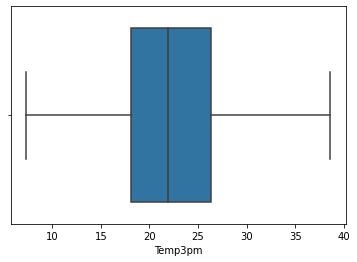

In [439]:
sns.boxplot(df['Temp3pm'])sns.boxplot(df['Temp3pm'])

In [440]:
IQR=df.Sunshine.quantile(0.75)-df.Sunshine.quantile(0.25)
lower_bridge=df.Sunshine.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Sunshine.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.299999999999998 19.699999999999996


In [441]:
df.loc[df['Sunshine']>=19.69,'Sunshine']=19.69
df.loc[df['Sunshine']<=-4.29,'Sunshine']=-4.29

<AxesSubplot:xlabel='Sunshine'>

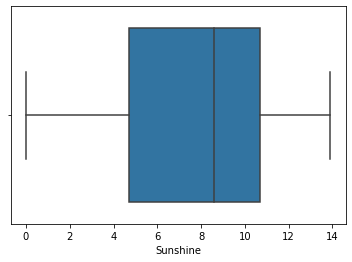

In [442]:
sns.boxplot(df['Sunshine'])

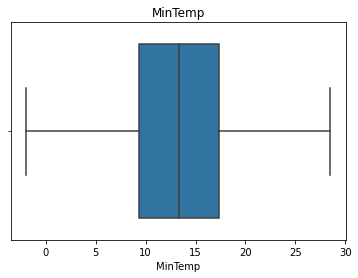

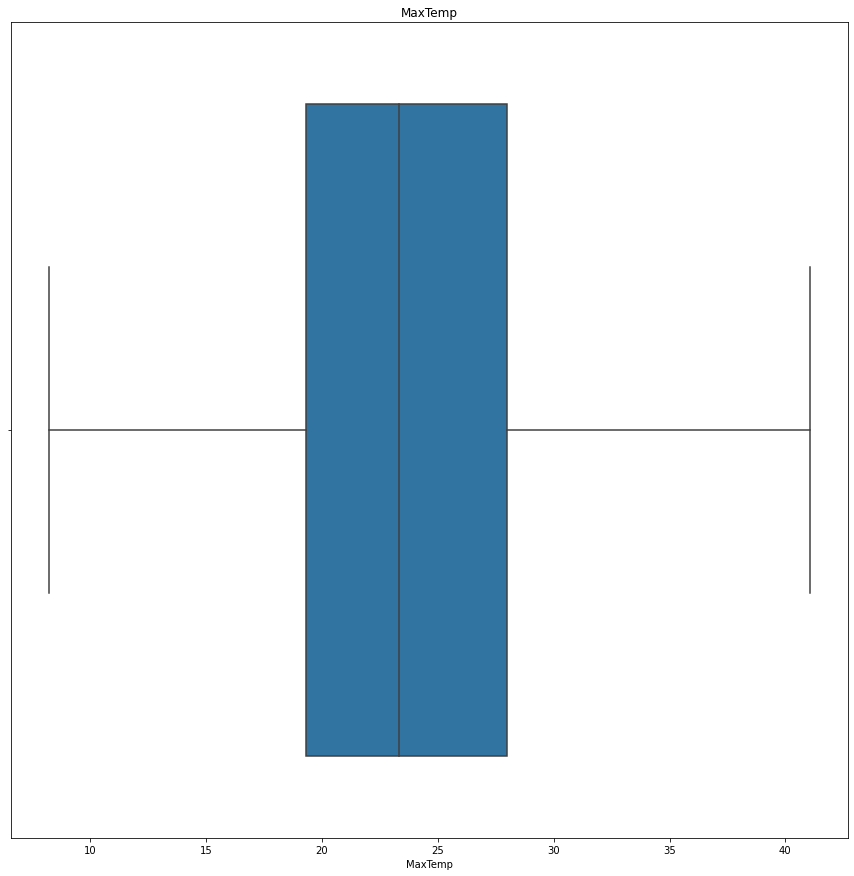

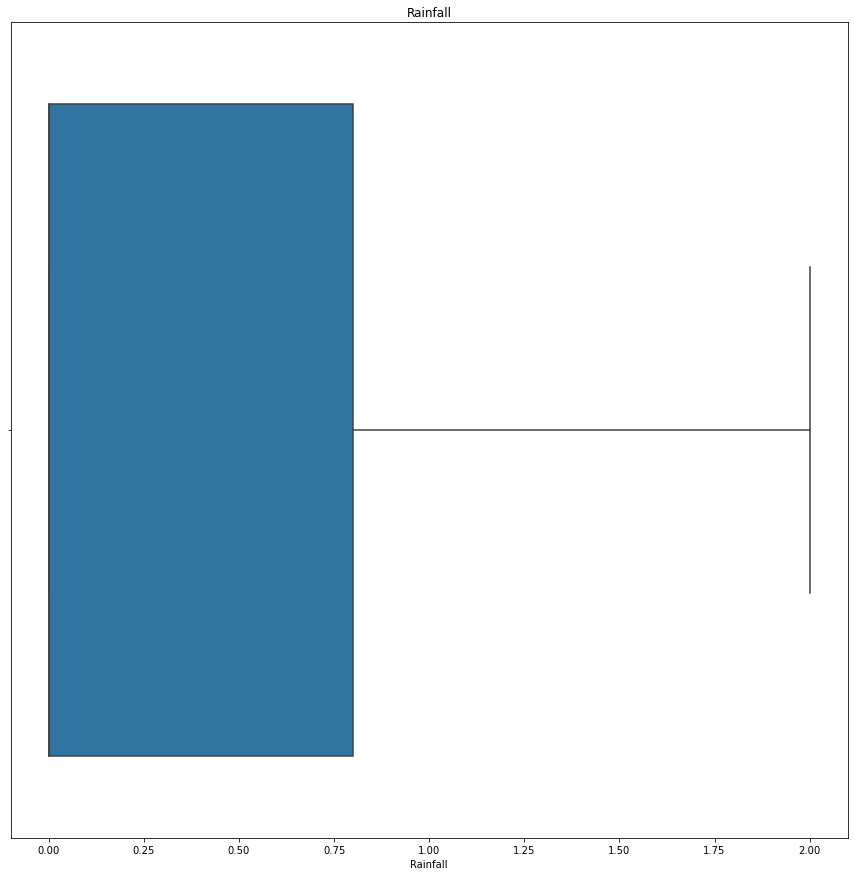

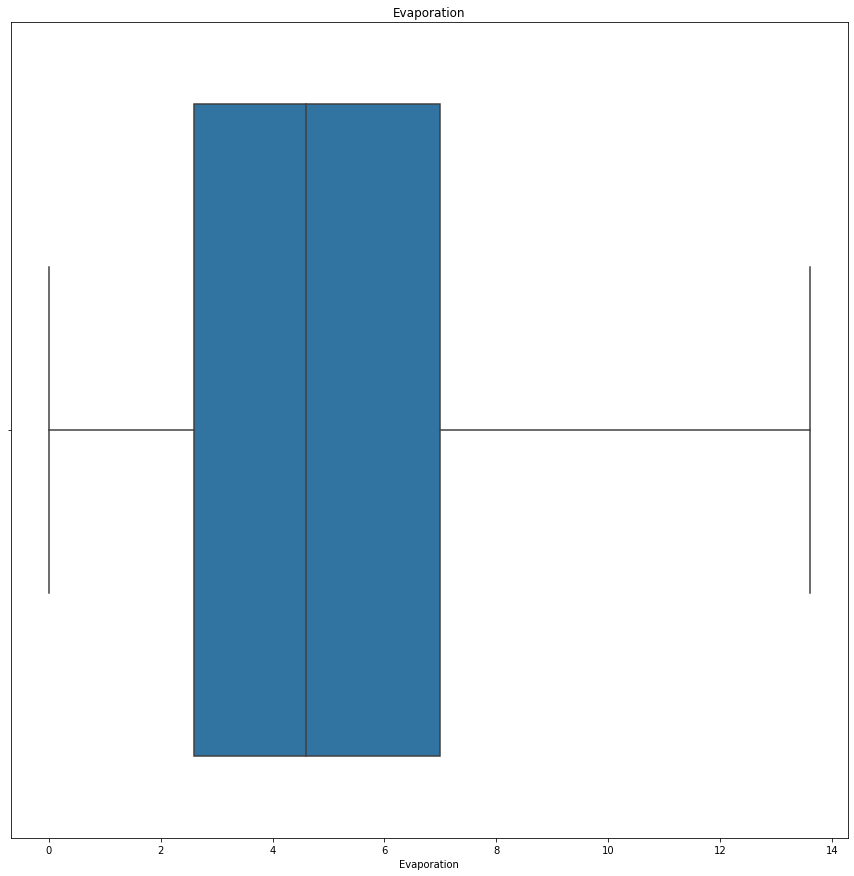

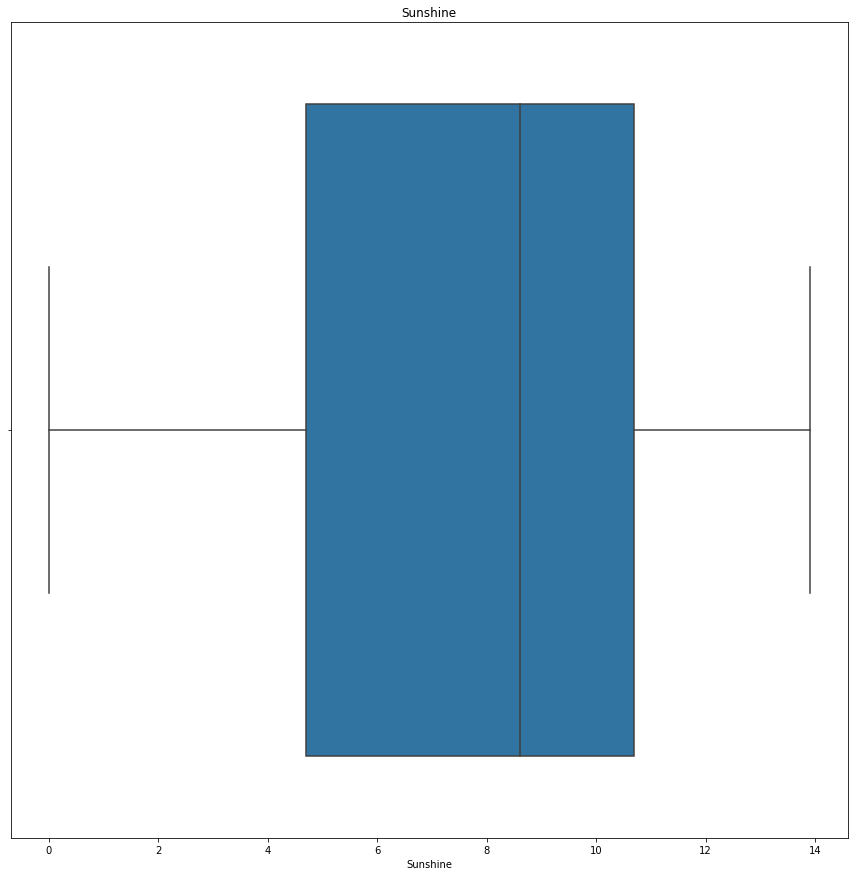

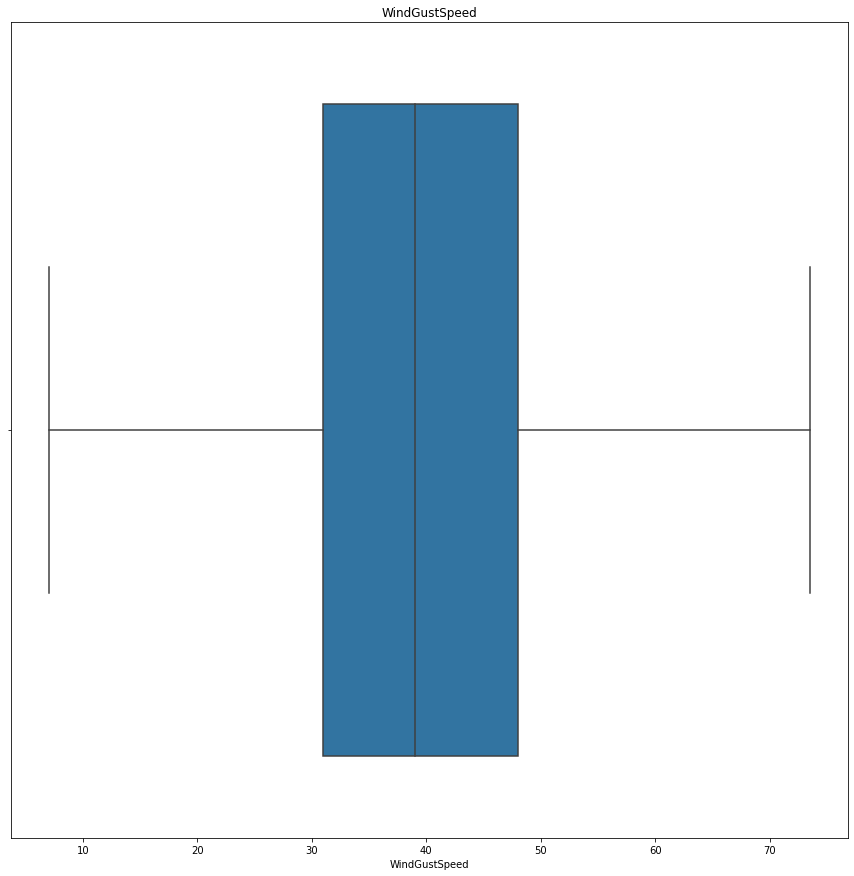

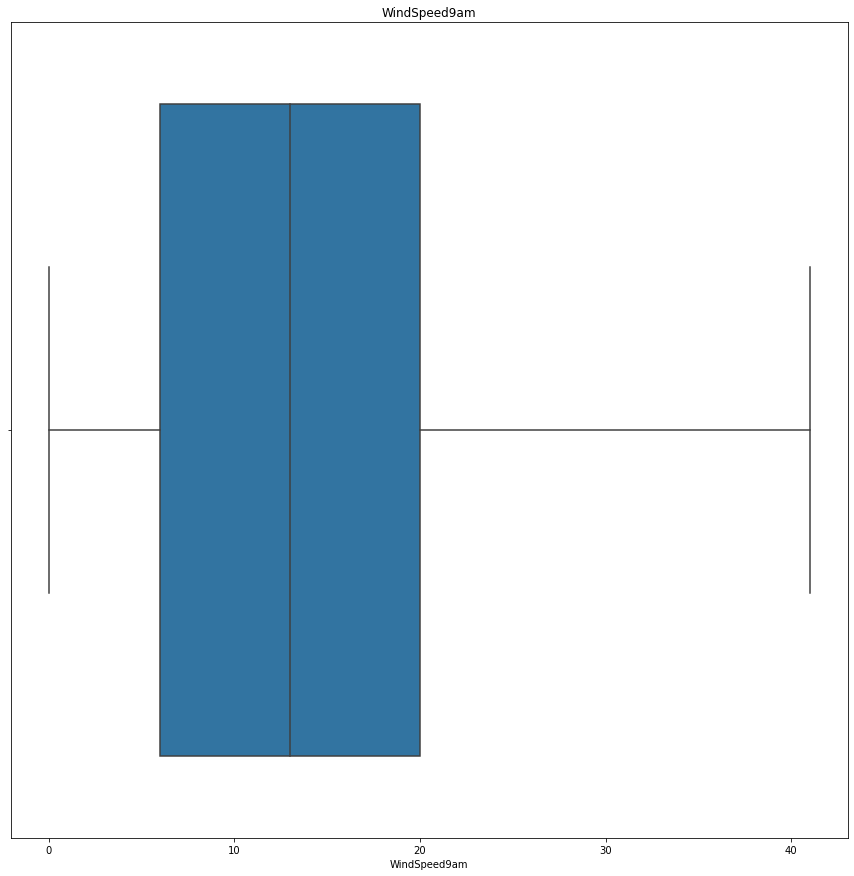

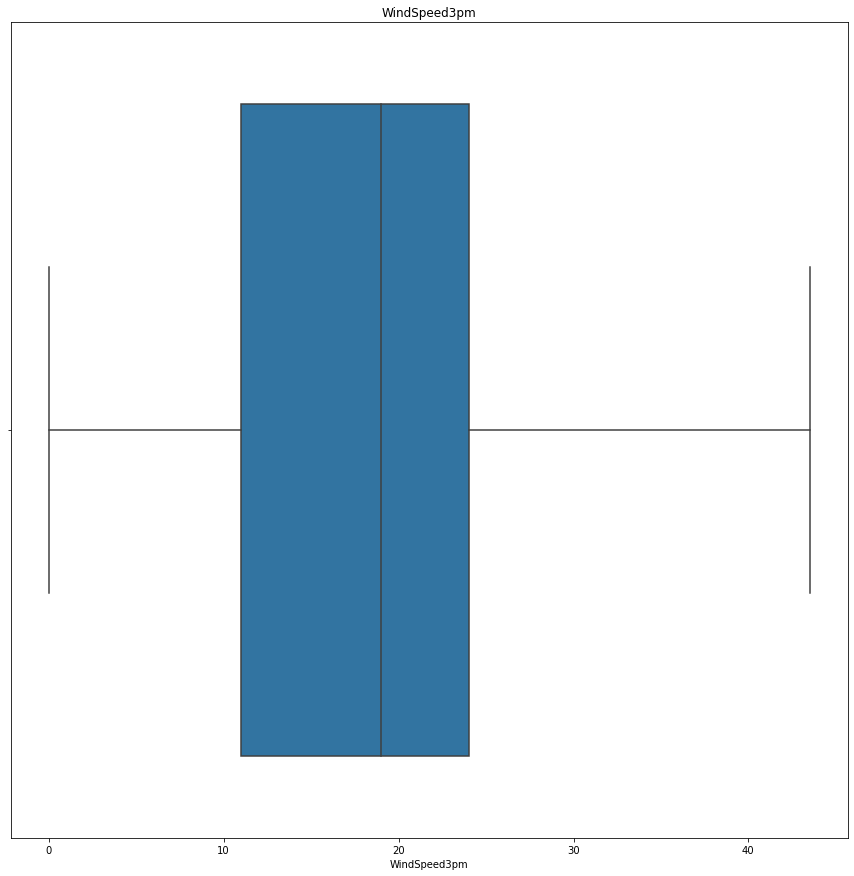

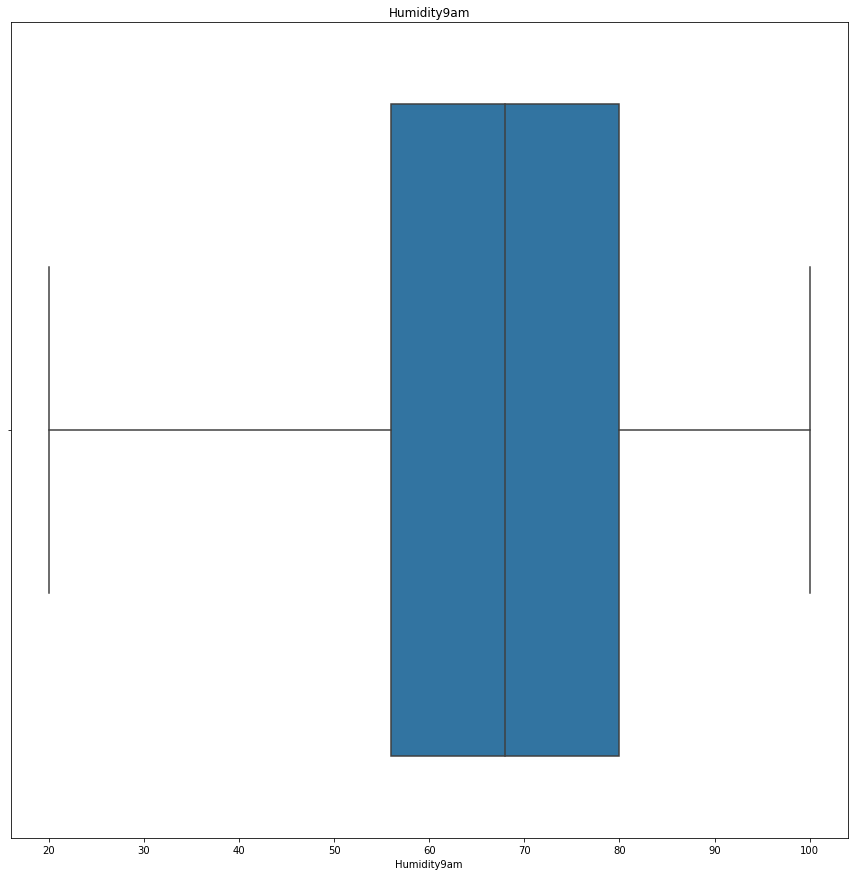

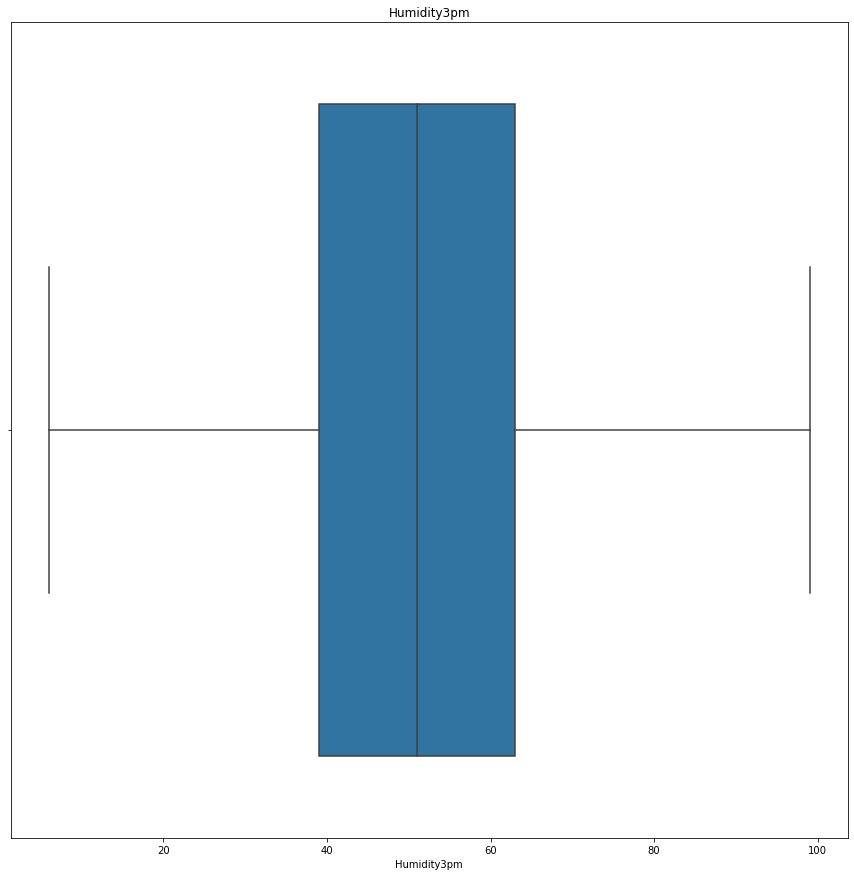

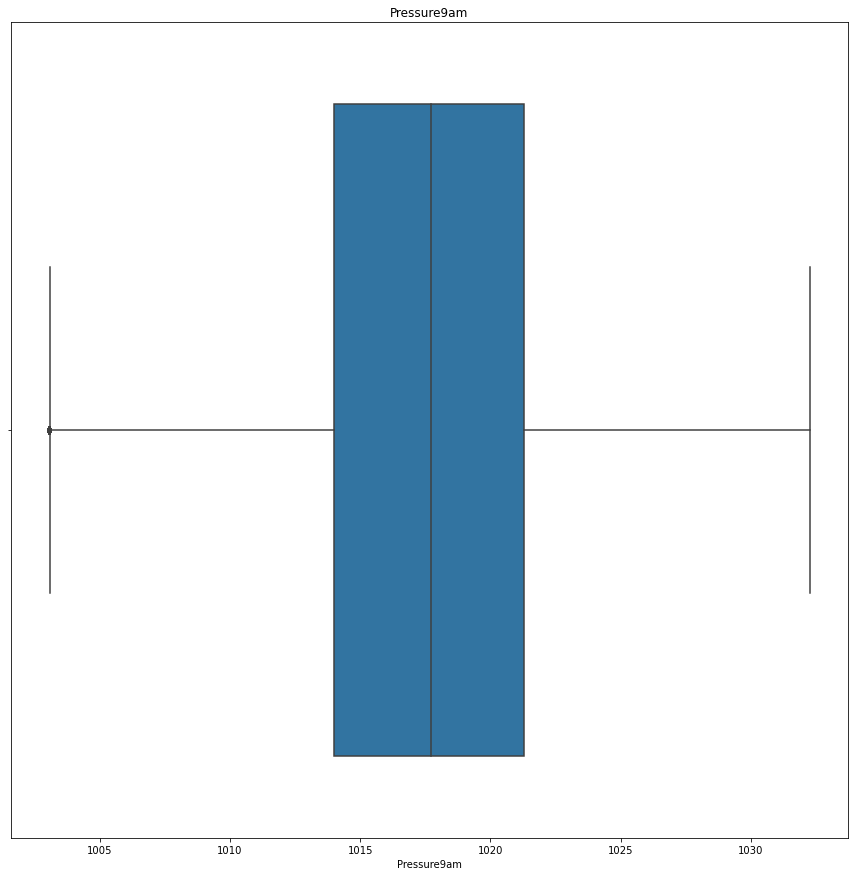

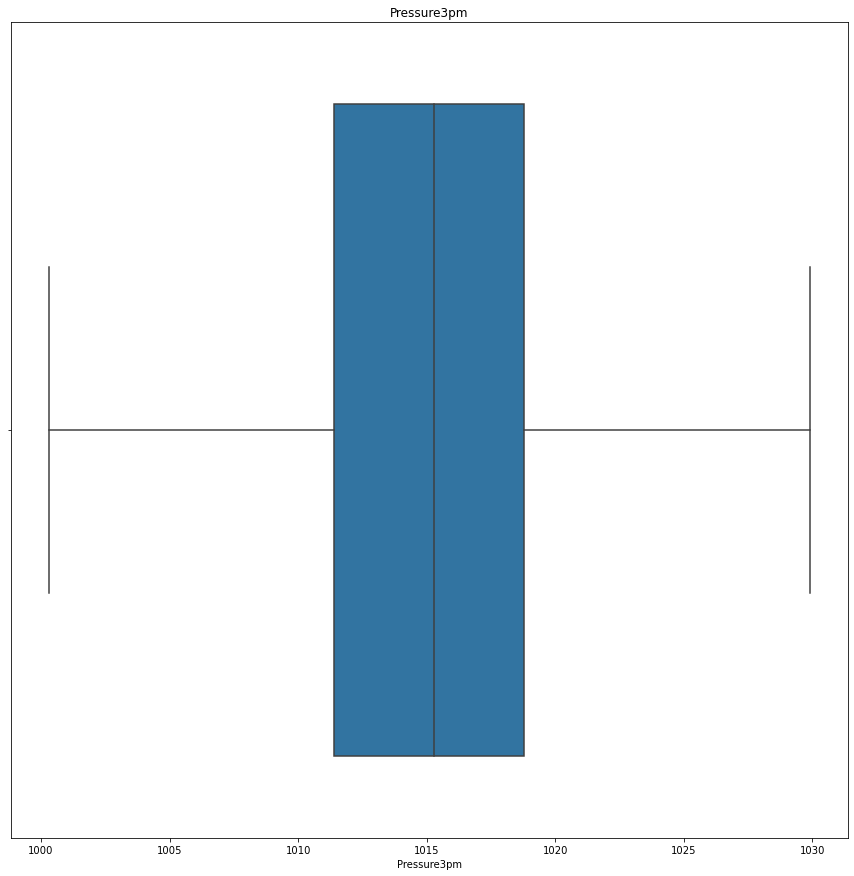

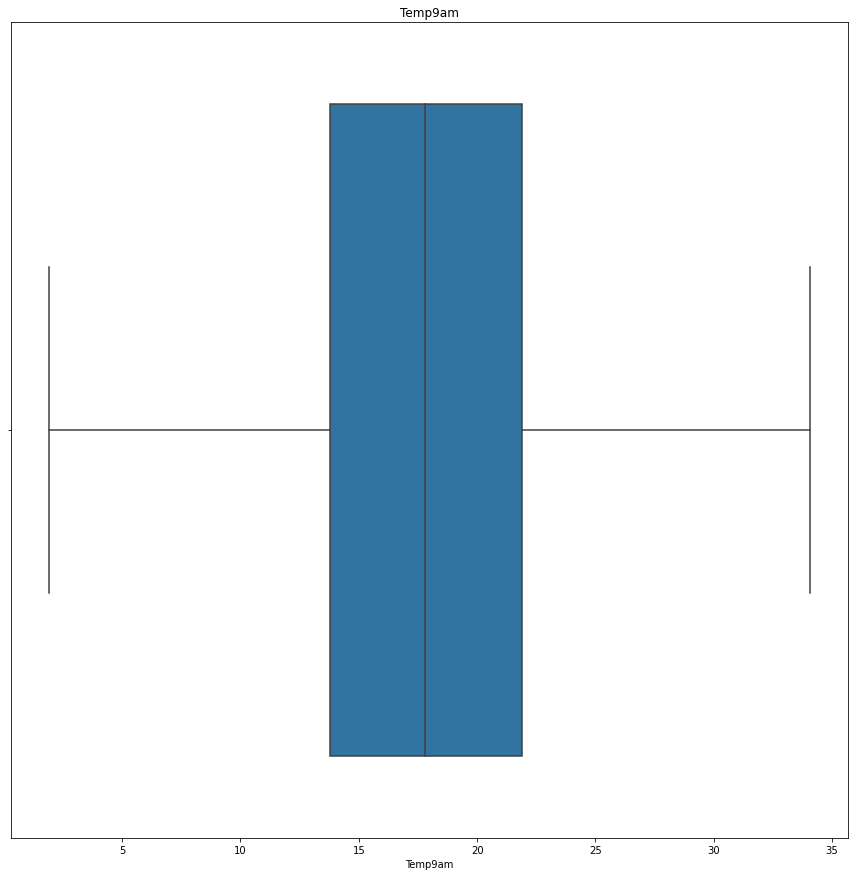

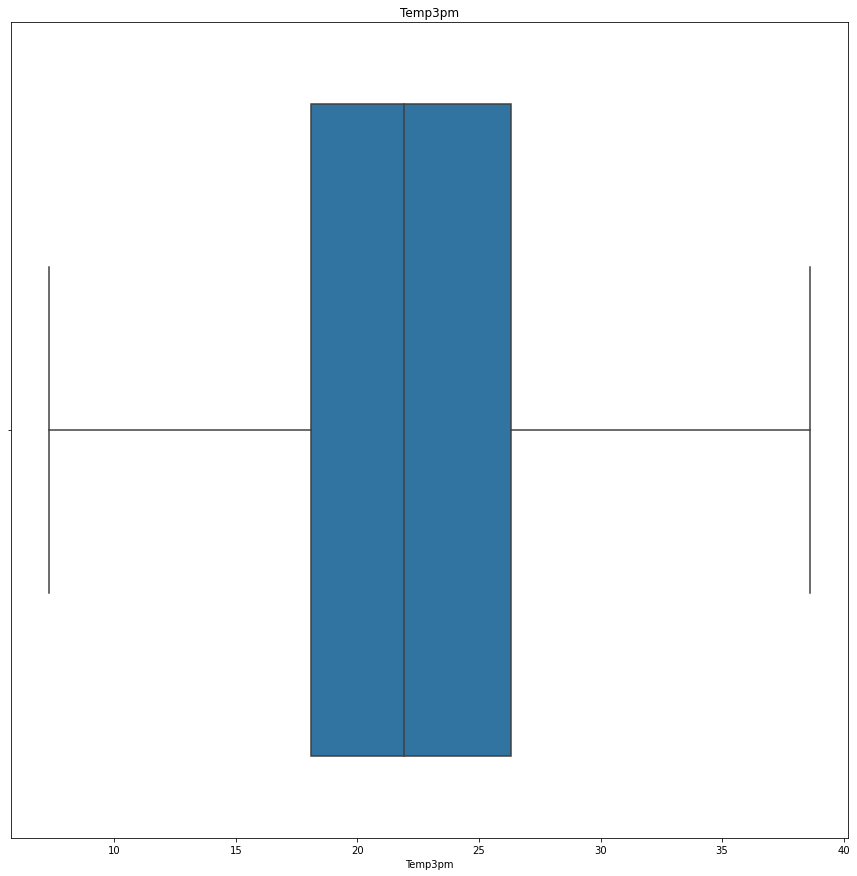

<Figure size 1080x1080 with 0 Axes>

In [443]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

Finaly we have remove the outliers

In [444]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


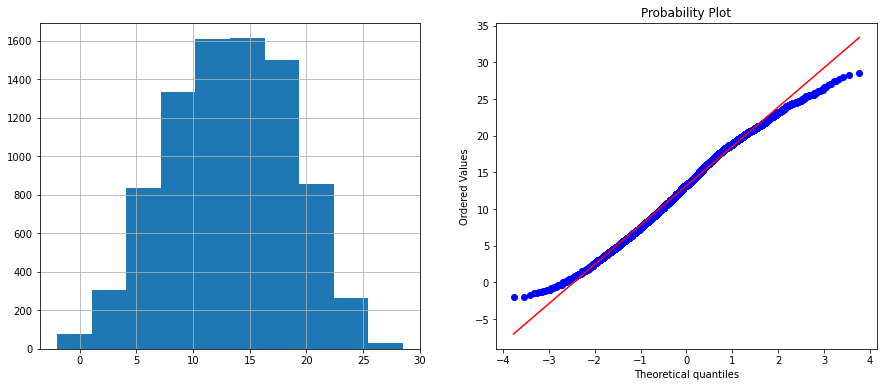

MaxTemp


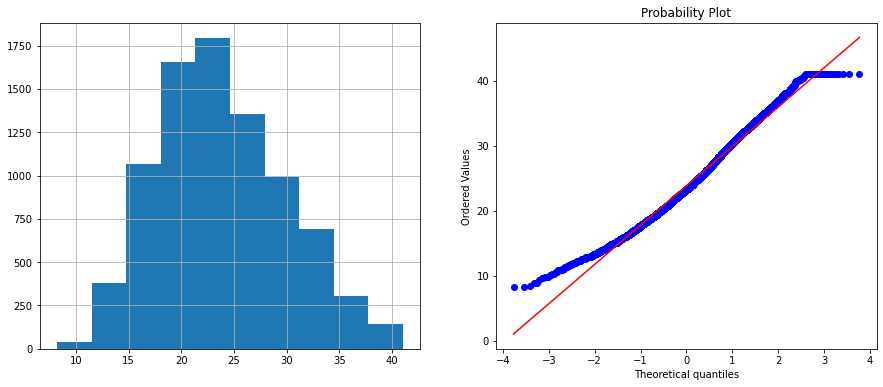

Rainfall


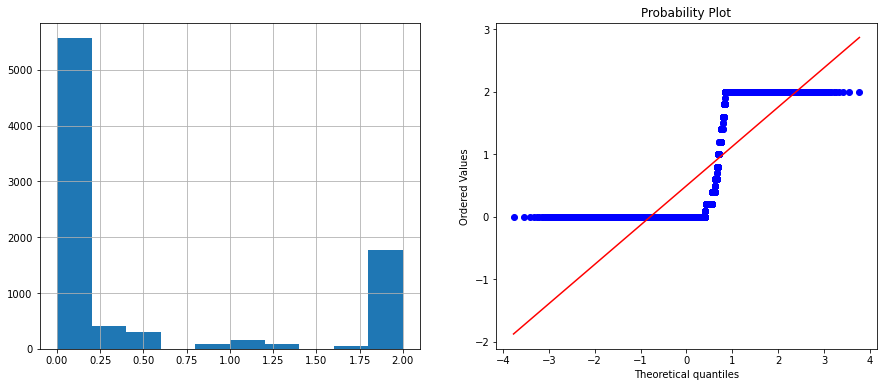

Evaporation


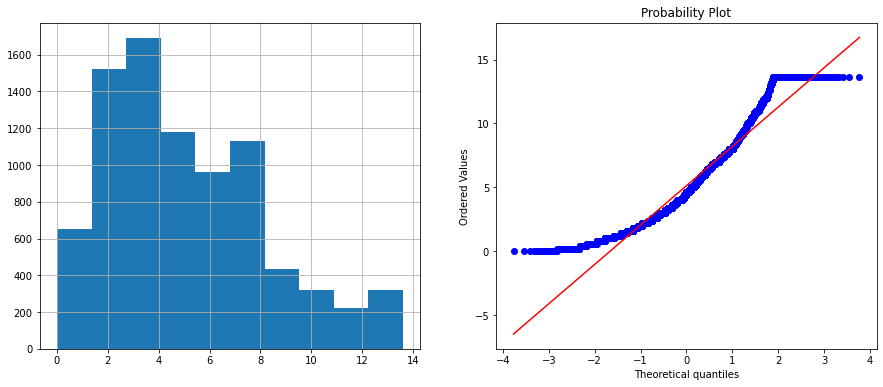

Sunshine


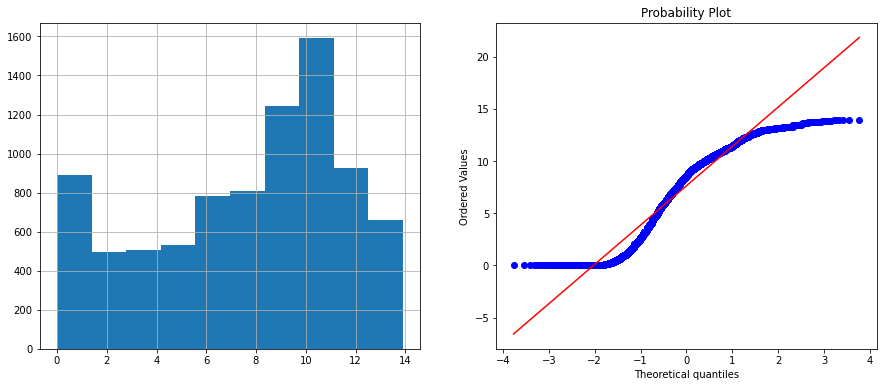

WindGustSpeed


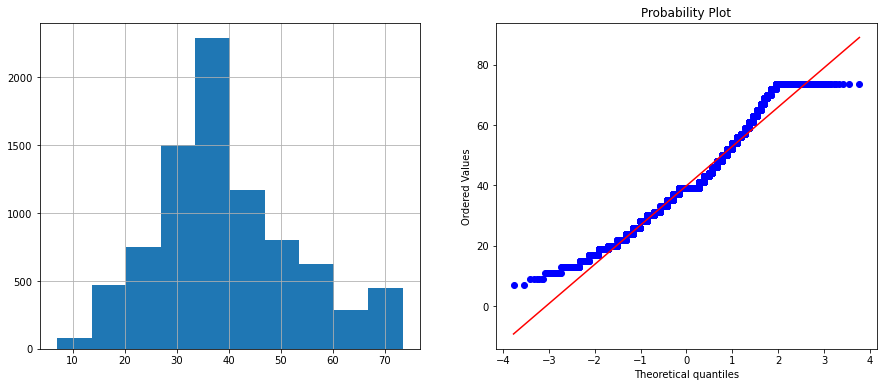

WindSpeed9am


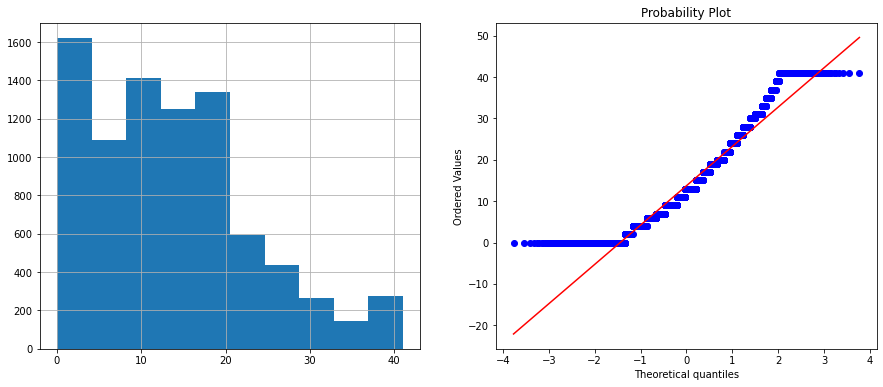

WindSpeed3pm


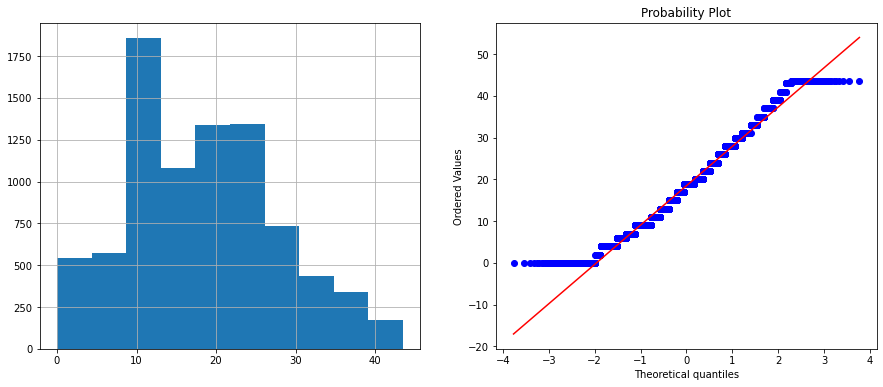

Humidity9am


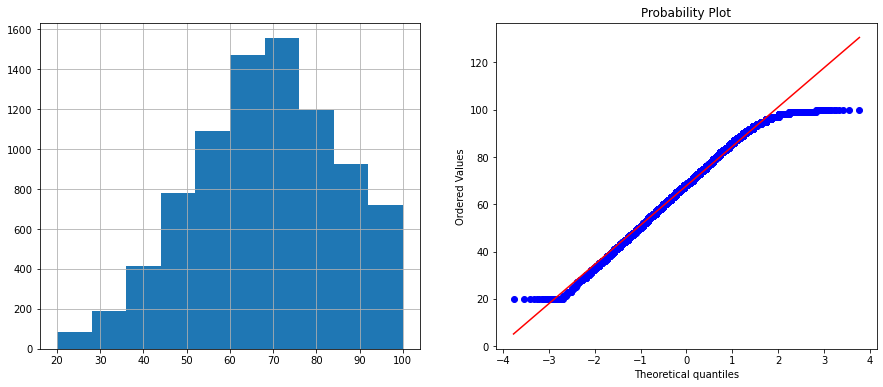

Humidity3pm


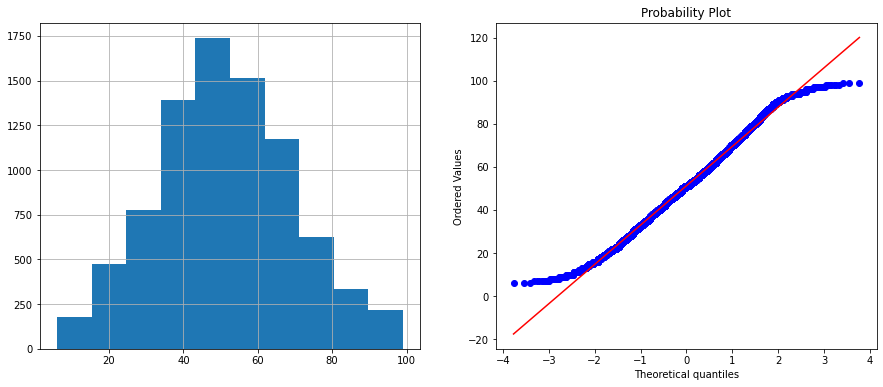

Pressure9am


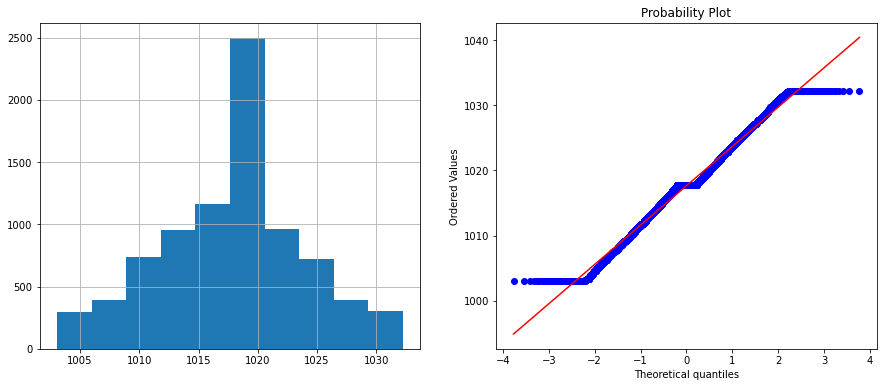

Pressure3pm


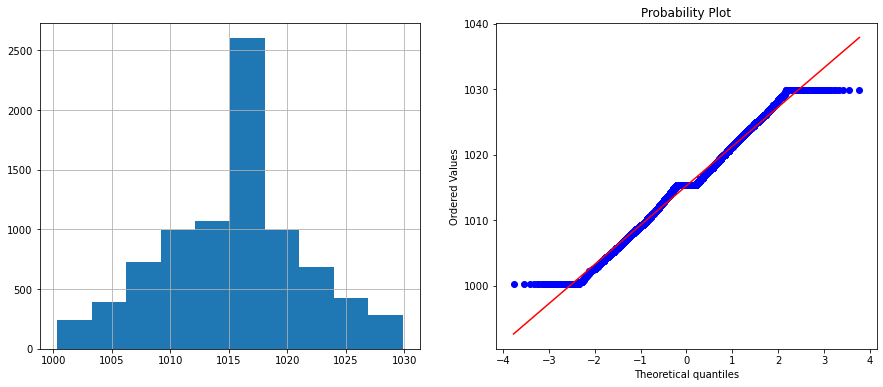

Temp9am


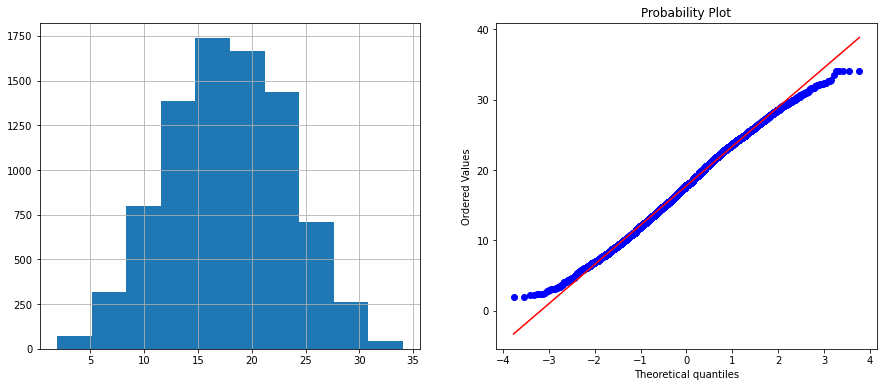

Temp3pm


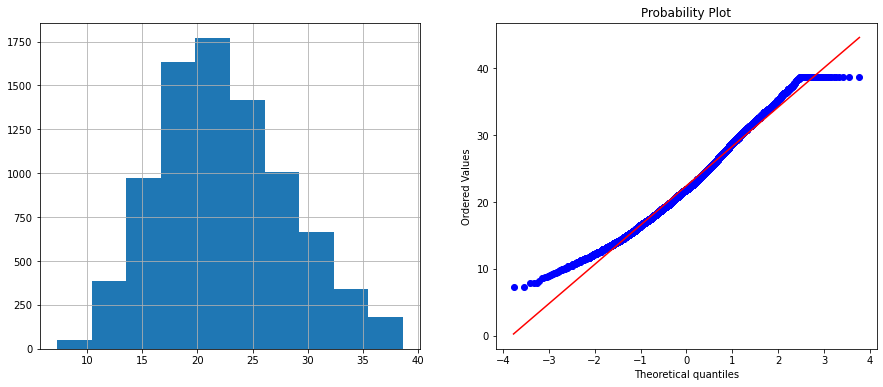

In [445]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [446]:
df.to_csv("preprocessed_1.csv", index=False)


In [470]:
x = df.drop(["RainTomorrow", "Date"], axis=1)
y = df["RainTomorrow"]

Seprating the data into training and testing variable

In [472]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

In [473]:
y_train


2038    0
3440    0
143     0
5467    0
8050    0
       ..
4373    0
7891    1
4859    1
3264    0
2732    1
Name: RainTomorrow, Length: 6740, dtype: uint8

In [474]:
y_test

1220    1
532     0
5998    0
7707    0
509     1
       ..
7198    1
6466    0
8102    1
4601    0
8064    0
Name: RainTomorrow, Length: 1685, dtype: uint8

# Imblanced data handling

In [475]:
y.value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

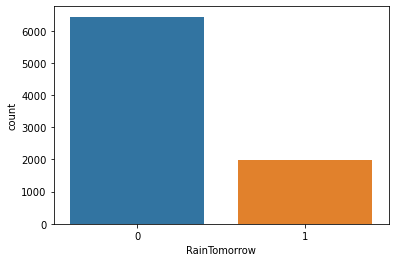

In [477]:
import seaborn as sns

sns.countplot(y)

In [478]:
from imblearn.over_sampling import SMOTE

In [479]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [480]:
y_train.value_counts()

0    6434
1    6434
Name: RainTomorrow, dtype: int64

Now, we can see that data is balanced

In [481]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Model Building

In [463]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier
xgboost=XGBClassifier()  #Xtrim Gredient Boosting Classifier 

print("Model is created")

Model is created


We are using almost 8 models. Now its time to train out model.

In [482]:
lr.fit(x_train, y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
adb.fit(x_train,y_train)
svm.fit(x_train,y_train)
gdboost.fit(x_train,y_train)
xgboost.fit(x_train,y_train)

print("Model is trained")

Model is trained


Our Model has been train now checking the accuracy:

In [484]:
print("Lr classification score",lr.score(x_train,y_train))
print("knn classification score",knn.score(x_train,y_train))
print("dt classification score",dt.score(x_train,y_train))
print("rf classification score",rf.score(x_train,y_train))
print("adb classification score",adb.score(x_train,y_train))
print("svm classification score",svm.score(x_train,y_train))
print("gdboost classification score",gdboost.score(x_train,y_train))
print("xgboost classification score",xgboost.score(x_train,y_train))

Lr classification score 0.8280415430267062
knn classification score 0.8765578635014837
dt classification score 1.0
rf classification score 1.0
adb classification score 0.8341246290801186
svm classification score 0.7602373887240356
gdboost classification score 0.8664688427299704
xgboost classification score 0.9985163204747775


Using confusion matrix in order to evaluate the models accuracy.

In [485]:
lr_yprad = lr.predict(x_test)
knn_yprad = knn.predict(x_test)
dt_yprad = dt.predict(x_test)
rf_yprad = rf.predict(x_test)
adb_yprad = adb.predict(x_test)
svm_yprad = svm.predict(x_test)
gdboost_yprad = gdboost.predict(x_test)
xgboost_yprad = xgboost.predict(x_test)

In [486]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for gdboost_model",'\n',xgboost_conf_mat)


knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for gdboost_model",'\n',knn_conf_mat)

confusion matrix for lr_model 
 [[1228   82]
 [ 209  166]]
confusion matrix for dt_model 
 [[1166  144]
 [ 117  258]]
confusion matrix for lr_model 
 [[1277   33]
 [ 146  229]]
confusion matrix for lr_model 
 [[1222   88]
 [ 194  181]]
confusion matrix for svm_model 
 [[1310    0]
 [ 375    0]]
confusion matrix for gdboost_model 
 [[1251   59]
 [ 185  190]]
confusion matrix for gdboost_model 
 [[1256   54]
 [ 114  261]]
confusion matrix for gdboost_model 
 [[1211   99]
 [ 192  183]]


Checking classification report for each model:

In [487]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)

xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)


 lr classification_report 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1310
           1       0.67      0.44      0.53       375

    accuracy                           0.83      1685
   macro avg       0.76      0.69      0.71      1685
weighted avg       0.81      0.83      0.81      1685

 knn classification_report 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1310
           1       0.65      0.49      0.56       375

    accuracy                           0.83      1685
   macro avg       0.76      0.71      0.72      1685
weighted avg       0.82      0.83      0.82      1685

 dt classification_report 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1310
           1       0.64      0.69      0.66       375

    accuracy                           0.85      1685
   macro avg       0.78      0.79      0.78

# ROC AUC Curve:

In [488]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dt.predict(x_test)))
print(roc_auc_score(y_test,rf.predict(x_test)))
print(roc_auc_score(y_test,adb.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))
print(roc_auc_score(y_test,gdboost.predict(x_test)))
print(roc_auc_score(y_test,xgboost.predict(x_test)))


0.6900356234096693
0.7062137404580152
0.7890381679389312
0.7927379134860051
0.7077455470737914
0.5
0.7308142493638677
0.8273893129770993


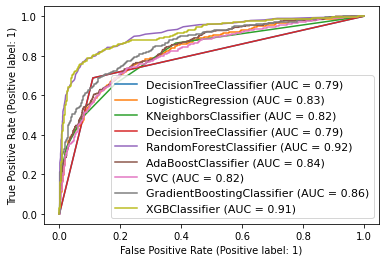

In [489]:
#lets find roc curve to check best fittted model

disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,x_test,y_test,ax=disp.ax_)

plt.legend(prop = {'size':11}, loc ='lower right')

As per above also we can see our RandomForestclassifier given the (0.92)score and XGBClassifier given (0.91) best scores.

# K-Fold Cross Validation :

In [490]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [494]:
print("Mean of Cross validation score for rf  model","=>",cross_val_score(rf,x,y,cv=5).mean())
print("Mean of Cross validation score for xgboost model","=>",cross_val_score(xgboost,x,y,cv=5).mean())


Mean of Cross validation score for rf  model => 0.8506824925816023
Mean of Cross validation score for xgboost model => 0.8141246290801188


As per above we can see our ‘xgboost’ model giving the less cross validation score. so we will consider this model is best for our prediction. Now will try hyperparameter tuning to check chances of accuracy increase

# HyperParameter Tuning

In [498]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [570]:
params_grid = {
    # Parameters that we are going to tune.
    'max_depth':range(6,7,8),
    'n_estimators':range(30,151,20),
    'eta':[.3],
    'subsample': [1],
    'colsample_bytree': [1],
}

In [571]:
# Instantiating logistic regression classifier
xgb = XGBClassifier()


In [581]:
# Instantiating the GridSearchCV object
xgb_cv = GridSearchCV(xgb, params_grid, cv = 5,n_jobs=3,verbose=3)

In [582]:
xgb_cv.fit(x, y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid={'colsample_bytree': [1], 'eta': [0.3],
                         'max_depth': range(6, 7, 8),
                         'n_estimators': range(30, 151, 20), 'subsample': [1]},
             verbose=3)

In [583]:
# Print the tuned parameters and score
print("Tuned XGBClassifier Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

Tuned XGBClassifier Parameters: {'colsample_bytree': 1, 'eta': 0.3, 'max_depth': 6, 'n_estimators': 130, 'subsample': 1}
Best score is 0.8163798219584569


# Workflow

# Data Collection:

# Data Preprocessing:
Missing Values Handled by Random Sample imputation to maintain the variance

Categorical Values like location, wind direction are handled by using Target guided encoding

Outliers are handled using IQR and boxplot

Imbalanced Dataset was handled using SMOTE

# Model Creation:
Different types of models were tried like GradientBoostingClassifier,Adaboost, random forest, logistic regression, xgboost, support vector machines, knn, naive bayes.

Out of these RandomForestclassifier,XGBClassifier and GradientBoostingClassifier top 3

The conclusion were made using classification metrics. roc curve and auc score

# Conclusion:

As per the predictive model and using machine learning algorithms,Tomorrow will be the rainy day,

92% - rainfall can be there.